In [1]:
# SET UP
using Pkg; Pkg.activate("C:/Users/nicot/GitHub/Heterogeneous Agents/notebooks/")
using Plots, Interpolations, LinearAlgebra, Optim, Roots, Parameters, JLD2, FileIO, XLSX, DelimitedFiles
pyplot(); gr(fmt=:png);
Pkg.status()

  Activating environment at `C:\Users\nicot\GitHub\Heterogeneous Agents\notebooks\Project.toml`


      Status `D:\GitHub\Heterogeneous Agents\notebooks\Project.toml`
  [336ed68f] CSV v0.10.12
  [17a596ad] ChebyshevApprox v0.3.2
  [35d6a980] ColorSchemes v3.24.0
  [1313f7d8] DataFramesMeta v0.14.1
  [31c24e10] Distributions v0.25.107
  [5789e2e9] FileIO v1.16.2
  [6218d12a] ImageMagick v1.3.0
  [a98d9a8b] Interpolations v0.15.1
  [d2bf35a9] IntervalRootFinding v0.5.11
  [033835bb] JLD2 v0.4.43
  [0db19996] NBInclude v2.3.0
  [2774e3e8] NLsolve v4.5.1
  [429524aa] Optim v1.7.8
  [d96e819e] Parameters v0.12.3
  [91a5bcdd] Plots v1.39.0
  [08abe8d2] PrettyTables v2.3.1
  [49802e3a] ProgressBars v1.5.1
  [92933f4c] ProgressMeter v1.9.0
  [d330b81b] PyPlot v2.11.2
  [f2b01f46] Roots v2.1.0
  [fd094767] Suppressor v0.2.6
  [bd369af6] Tables v1.11.1
  [239c3e63] Vega v2.6.2
  [fdbf4ff8] XLSX v0.10.1
  [8bb1440f] DelimitedFiles
  [37e2e46d] LinearAlgebra


# Thesis Model 3

- 2 Idiosyncratic shocks:
    1. over firms possibility of changing prices
    2. over households employment status
- 2 Financial frictions:
     1. limited diversification -> risky asset
     2. debt limit
- 2 Assets types
    1. Risky: Capital (local)
    2. Safe: Bond (foreign)
- Calvo Pricing approach
    If a firm cannot update its price, it will set the previous-period optimal price

Individuals variables are in lowercase (when it's needed I will add to the notation the subindex $j$ for firms' variables and $i$ for households' variables).

## Households

There is a continuum of households of mass 1 aligned in the cartesian product $[0\; , \; 1] \times [0\; , \; 1]$.

Households are subject to an idiosyncratic employment shock, that follows a two state Markov's process $n_t\in\{n_e,n_u\}$ (employed, unemployed). Households supply labor inelastically. Therefore, aggregate stationary employment is determined by the probabilities of the Markov's process:
\begin{equation*}
    Pr_N^*(e)=Pr(n'=n_e|n=n_u)\,/\,\big[Pr(n'=n_u|n=n_e)+Pr(n'=n_e|n=n_u)\big] \quad \quad Pr_N^*(u) = 1- Pr_N^*(e)
\end{equation*}
$$N = Pr_N^*(e) n_e + Pr_N^*(u) n_u $$

Households can invest capital $k$ in a single firm (randomnly chosen if indeference). A single firm can (and will) recieve capital investments from more than one houshold; but a single household cannot invest in more than one firms. Threfore, for example, if houshold $i$ invests $k_t^i$ in firm $j$, in the next period she can claim a portion of firm $j$ benefits proportional to her investment, i.e. $\Pi_{t+1} (k_t^i/k_t^j) - \delta k_t^i$. Where $k^j_t$ is the total investment recieved by firm $j$, and $\delta$ is the depreciation rate. Thus one can construct the capital return rate $r_{t+1} \equiv \Pi_{t+1}/k_t^j) - \delta$.

However, those benefits depend -among other variables- on the price shock. If firms can adjust prices the benfit will be $\hat{\Pi}$ ($\hat{r})$, else $\check{\Pi} ($\check{r}). This shock is i.i.d. among firms, i.e., chosing another firm will not change the investment risk.

Household can buy the final good not only to use it as capital, but to consume. Consumptions preferences are defined by a CRRA instantaneous utility function with RRA parameter $\gamma$, and by the intertemporal discount factor $\beta$.

Finally, households can borrow or lend to the rest of the world at a safe rate $R_f$ by purchasing positive or negative amounts of the safe asset $b$.

$$
c_t+k_t+b_t \leq n_t W_t + k_{t-1}(1+r_t) + b_{t-1}(1+R_f)
$$
\begin{equation*}
c_t \geq 0
\end{equation*}
\begin{equation*}
k_t \geq 0
\end{equation*}
\begin{equation*}
b_t \geq b_{min}
\end{equation*}


## Firms

The aggregate good $Y$ is produced with a continuum of intermediate goods, the technology is defined by the CES $\rho$ and the TFP $A$.


Each firm production function is:
$$
y_t=z_t k_{t-1}^\eta l_t
$$

All firms **choose** their ideal price, but only a fraction of them can **set** prices. A firm sets prices with probability $\lambda$ at any given period. If she cannot set prices, its price will be the previous optimal price. $P_t^j=\hat{P}_t^j$ con probabilidad $\lambda$; o $P_t^j=\hat{P}_{t-1}^j$ con probabilidad $1-\lambda$.

Additionally, the firms are subject to a second idiosyncratic shock, this time a shock over their individual TFP, which is determined by the random variable $z_t$. 

Before the shocks each firm choses her optimal price. Once the the shocks take place, $z_t$ and $P_t$ are defined, which will determine the demanded amount $y_t$ for each firm (note that it will vary between firms). Moreover, this will determine the labor demand $l_t$ for each firm. However, this will have no impact on the capital $k_{t-1}$ required to produce, since it has been already set in the previous period.

The optimal price in real terms is

\begin{equation} \label{p_rel_opt}
    \hat{p}_t = \frac{1}{\rho} \Big[ (1-\alpha_t) \frac{w_t}{\zeta k_{t-1}^\eta} + \alpha_t \frac{w_{t+1}}{\zeta k_{t}^\eta}(1+\pi_t) \Big]
\end{equation}

Where $\zeta \equiv 1/E(1/z_t) \;\;\; \forall t$.


## Rest of the world

The rest of the world borrow (or lend) the amount $b$ to a local household at a free risk rate $r_f$.

However they only lend if a collateral restriction is satisfied: $ b_{t} \geq b_{min} $

## Central Bank

It sets the inflation rate $\pi$.

In [2]:
# STEP 1: Parameters α

@with_kw struct Parametros
    
    # Household Parameters
    γ = 5.0
    β = 0.993
    c_min = 0.001

    #Firm parameters
    η = 0.25
    τ = 0.83
    δ = 0.017
    ρ = 0.78
    σ = 1/(1-ρ)
    A = 1.0

    # n as a Markov process of two states and order 1:
    Pn = [0.9522 0.0478; 0.5 0.5 ]  # 𝜖=1 empleado (e), 𝜖=2 desempleado (u); la fila me dice dónde estoy, la columna a dónde puedo ir
    n = [1.0 0.4]
    Pe=Pn[2,1]/(Pn[2,1]+Pn[1,2])
    Pu=1-Pe
    N=Pe*n[1]+Pu*n[2]

    # Calvo Pricing probability
    λ = 0.7
    Pλ = [λ 1-λ]

    # Production function
    Z = [1.013 0.12]
    Pz = [0.985 0.015]
    Ez = (Z*Pz')[1]
    ζ = (Z.^(-1/τ) *Pz')[1]^(-τ)
    
    Pr = vec(Pz'*Pλ)

    # Exogenous Variables
    ππ = 0.1
    Rf = 0.007
    b_min = -6.0
    
    # Relative Price
    p = A * ( λ + (1-λ)*(1+ππ)^(σ-1) ) ^ (1/(σ-1))
    # Marginal Cost Weight
    α = ((1-λ)*(1+ππ)^(σ-1)/(1+Rf))/(λ+(1-λ)*(1+ππ)^(σ-1)/(1+Rf))
    
    # Golden Rule's K
    golden_K = (  δ * (λ+(1-λ)*(1+ππ)^(σ/τ))^τ  / ( η * A^(1-σ) * N^τ * p^σ * ζ )   )^(1/(η-1))
    
    # Aproximate articipation of wages
    W_Y = τ * ρ
    
end

Para_0 = Parametros()

Parametros
  γ: Float64 5.0
  β: Float64 0.993
  c_min: Float64 0.001
  η: Float64 0.25
  τ: Float64 0.83
  δ: Float64 0.017
  ρ: Float64 0.78
  σ: Float64 4.545454545454546
  A: Float64 1.0
  Pn: Array{Float64}((2, 2)) [0.9522 0.0478; 0.5 0.5]
  n: Array{Float64}((1, 2)) [1.0 0.4]
  Pe: Float64 0.9127418765972983
  Pu: Float64 0.08725812340270167
  N: Float64 0.947645125958379
  λ: Float64 0.7
  Pλ: Array{Float64}((1, 2)) [0.7 0.30000000000000004]
  Z: Array{Float64}((1, 2)) [1.013 0.12]
  Pz: Array{Float64}((1, 2)) [0.985 0.015]
  Ez: Float64 0.999605
  ζ: Float64 0.8823484711302116
  Pr: Array{Float64}((4,)) [0.6895, 0.010499999999999999, 0.29550000000000004, 0.0045000000000000005]
  ππ: Float64 0.1
  Rf: Float64 0.007
  b_min: Float64 -6.0
  p: Float64 1.032638810373058
  α: Float64 0.37370481886399426
  golden_K: Float64 28.379258632243634
  W_Y: Float64 0.6474


## Equilibrium at Stationary State

At stationary state, aggregate variables as aggregate labour supply, real wage, and aggregate capital are constant and represented by $N$, $W$ and $K$.

### Intermediate Goods Market

\begin{equation}
    \hat{p}=\big[ \lambda + (1+\lambda)(1+\pi^*)^{\sigma -1}   \big]^\frac{1}{\sigma -1}
\end{equation}

\begin{equation}
    \alpha = \frac{(1-\lambda)\frac{(1+\pi^*)^{\sigma-1}}{1+R}}{\lambda+(1-\lambda)\frac{(1+\pi^*)^{\sigma-1}}{1+R}}
\end{equation}

### Labor Market

\begin{equation} \label{w_ee}
    w=\frac{ \hat{p}^{\frac{\tau+(1-\tau)\sigma}{\tau}} \rho \tau \zeta^{1/\tau} }{ Y^{\frac{1-\tau}{\tau}} \Big[ 1 - \alpha + \alpha (1+\pi)^{\frac{\tau+(1-\tau)\sigma}{\tau}} \Big] } K^{\eta/\tau}
\end{equation}

\begin{equation} 
Y = \frac{\zeta AN^\tau  K^\eta\hat{p}^\sigma}{ \Big[ \lambda + (1-\lambda) \big(1+\pi\big)^{\sigma/\tau} \Big]^{\frac{\tau+(1-\tau)\sigma}{\tau}} }
\end{equation}

### Return on capital

\begin{equation} \label{r_ee_2}
    r = \left\{ \begin{array}{llll} \hat{r} = \frac{\hat{\Pi}(k,w,z_H) }{k} -\delta & \text{con probabilidad } \lambda \theta \\
    \hat{r} = \frac{\hat{\Pi}(k,w,z_L) }{k} -\delta & \text{con probabilidad } \lambda (1-\theta) \\
    \check{r}=\frac{\check{\Pi}(k,w,z_H) }{k} -\delta & \text{con probabilidad } 1-\lambda \theta \\
    \check{r}=\frac{\check{\Pi}(k,w,z_L) }{k} -\delta & \text{con probabilidad } (1-\lambda) (1-\theta)
    \end{array} \right.
\end{equation}

Where $\theta$ is the probability that $z_t=z_H$, and $z_H>z_L$.


### Assets grid

There are lower bounds for the assets:

\begin{equation*}
b \geq b_{min}
\end{equation*}

\begin{equation*}
k \geq 0
\end{equation*}

But there is no clear maximum. Usually, when we are dealing with only one asset we choose the upper bound for the grid somewhat arbitrarily.

When dealing with two asset it would be useful to choose an arbitrary large upper bound for the sum of the assets, this is what Hintermaier & Koeniger (2010) did (maybe not explicitly).

\begin{equation*}
k + b \leq x_{max}
\end{equation*}

So we can picture the feasible set as a triangle in the $k'$ $b'$ plane (instead of a more intuitive square).

In fact, it would be useful to define $x\equiv k + b$ and replace $b$ for $x$, for the EGM method. This is the approach followed by Hintermaier & Koeniger (2010). Re-thinking the problem in terms of $k$ and $x$ (instead of $k$ $b$) will let us handle the occasionally binding constraint easier, and iterate over a single policy function.

Then, the $b$ restriction becomes:
\begin{equation*}
x-k \geq  b_{min}
\end{equation*}

Which means:
\begin{equation*}
k \leq   x - b_{min}   
\end{equation*}

$b$ lower bound now is an upper bound for $k$. 

In [3]:
function parameters_check(P)
    @unpack λ, ππ, σ, α, p = P
    
    # Optimal price
    @show σ
    @show (1-λ)/λ * (1+ππ)^(σ-1)
    @show (1-λ)/λ * (1+ππ)^(σ-1) < 1
    @show α
    @show p

    # Real Wage
    @show (1-α)/α/(1+ππ)
    @show (1-α)/α/(1+ππ) < 1
    
    return (1-λ)/λ * (1+ππ)^(σ-1), (1-α)/α/(1+ππ)

end


function parameters_check_noshow(P) 
    @unpack λ, ππ, σ, α, p = P
    return (1-λ)/λ * (1+ππ)^(σ-1), (1-α)/α/(1+ππ)
end

parameters_check_noshow (generic function with 1 method)

In [4]:
# Utility function
u_crra(c,γ) = γ==1.0 ?  log(c)  :  (c^(1-γ)-1)/(1-γ)
u_crra_inv(u,γ) = γ==1.0 ?  exp(u)  :  (u*(1-γ)+1)^(1/(1-γ))
constant_term(c,γ)  = γ==1.0 ?  log(c) - 1.5 : γ*(1+γ)*c^(1-γ)*0.5/(1-γ) - 1/(1-γ)
u(c,γ,c_min) = c>=c_min ?  u_crra(c,γ)  :  (1+γ)*c_min^(-γ)*c - γ*c_min^(-γ-1)*0.5*c^2 +  constant_term(c_min,γ)
UMg(c,γ,c_min) = c>=c_min ?  c^(-γ)  : (1+γ)*c_min^(-γ) - γ*c_min^(-γ-1)*c  # para controlar casos de consumo negativo
UMg_inv(umg,γ,c_min) = umg < c_min^(-γ) ? umg^(-1/γ) : ( (1+γ)*c_min^(-γ) - umg ) / ( γ*c_min^(-γ-1) )  # falta la inversa

# Calvo equilibrium
#Y(K,P) = P.ζ * P.N^P.τ * K^P.η * P.p^P.σ /  ( P.λ + (1-P.λ)*(1+P.ππ)^(P.σ/P.τ) )^P.τ 
function Y(K,P) 
    @unpack λ, ππ, σ, ζ, p, η, τ, N = P
    return ζ * N^τ * K^η * p^σ /  ( λ + (1-λ)*(1+ππ)^(σ/τ) )^τ
end


#w(K,P) = P.p^((P.τ+(1-P.τ)*P.σ)/P.τ)  *  P.ζ^(1/P.τ)  * P.ρ * P.τ * K^(P.η/P.τ) / ( Y(K,P)^((1-P.τ)/P.τ) * (1+P.α+P.α*(1+P.ππ)^((P.τ+(1-P.τ)*P.σ)/P.τ) ) )
function w(K,P) 
    @unpack λ, ππ, ρ, σ, ζ, p, η, τ, α = P
    numerador = p^((τ+(1-τ)*σ)/τ)  *  ζ^(1/τ)  * ρ * τ * K^(η/τ)
    denominador = Y(K,P)^((1-τ)/τ) * ( 1 - α + α *(1+ππ)^((τ+(1-τ)*σ)/τ))
    return numerador / denominador
end



# Benefits
#Π(Price,K,P,Z) = Y(K,P) * P.A^(P.σ-1) * Price^(-P.σ) * ( Price - w(K,P)/(Z*K^P.η))
#Π(Price,K,P,Z) = Y(K,P) * Price^(1-P.σ) - w(K,P) * ( Y(K,P) / ( Price^P.σ * Z * K^P.η ) )^(1/P.τ)
function Π(Price,K,P,Z) 
    @unpack λ, ππ, σ, ζ, p, η, τ = P
    Ingresos = Y(K,P) * Price^(1-σ)
    Costos = w(K,P) * ( Y(K,P) * Price^(-σ) / (Z * K^η) )^(1/τ)
    return Ingresos - Costos
end
r_h(K,P,Z) = Π(P.p,K,P,Z)/K - P.δ
r_l(K,P,Z) = Π(P.p/(1+P.ππ),K,P,Z)/K - P.δ
r(K,P) = [r_h(K,P,P.Z[1]) r_h(K,P,P.Z[2]) r_l(K,P,P.Z[1]) r_l(K,P,P.Z[2])]
;

In [5]:
K_ej = 20.0
Para_ej = Parametros()

@show Y_ej=Y(K_ej,Para_ej)
@show W_ej=w(K_ej,Para_ej)
@show Π_ej=Π(Para_ej.p,K_ej,Para_ej,Para_ej.Z[1])
@show r_ej=r(K_ej,Para_ej)

@show rE_ej = (r_ej * Para_ej.Pr)[1];
@show Investment_ej = Para_ej.δ * K_ej

rE_ej * K_ej + W_ej * Para_ej.N - ( Y_ej - Investment_ej)


Y_ej = Y(K_ej, Para_ej) = 1.768142226714746
W_ej = w(K_ej, Para_ej) = 1.2083074979933195
Π_ej = Π(Para_ej.p, K_ej, Para_ej, Para_ej.Z[1]) = 0.7736349105788503
r_ej = r(K_ej, Para_ej) = [0.02168174552894251 -0.46354006791361607 0.025840995026730554 -0.7919180178646903]
rE_ej = (r_ej * Para_ej.Pr)[1] = 0.014154775779120667
Investment_ej = Para_ej.δ * K_ej = 0.34


4.440892098500626e-16

### Households problem at stationary state

The household problem at stationary state is:

\begin{equation*}
\begin{aligned}
    V(k_{t-1},b_{t-1}|n_t,r_t) = \max_{k_t,b_t} & \Big\{  \frac{(c_t)^{1-\gamma} -1}{1-\gamma} + \beta E_t V(k_{t},b_{t}|n_{t+1},r_{t+1}) \Big\} \\
    \text{sujeto a:   } & n_t W + k_{t-1} \big(1+r_t\big) + b_{t-1} \big(1+R_f\big) \geq c_t + k_t + b_t \\
    & k_t \geq 0 \\
    & b_t \geq b_{min}
\end{aligned}
\end{equation*}

Then, the policy correspondence that solves this problem is:

\begin{equation} \label{g}
\begin{aligned}
    g(k_{t-1},b_{t-1}|n_t,r_t) = \text{arg}\max_{k_t,b_t} & \Big\{  \frac{(c_t)^{1-\gamma} -1}{1-\gamma} + \beta E_t V(k_{t},b_{t}|n_{t+1},r_{t+1}) \Big\} \\
    \text{sujeto a:   } & n_t W + k_{t-1} \big(1+r_t\big) + b_{t-1} \big(1+R_f\big) \geq c_t + k_t + b_t \\
    & k_t \geq 0 \\
    & b_t \geq b_{min}
\end{aligned}
\end{equation}

To simplify notation we can say that:
\begin{equation*} \label{pol}
\begin{aligned}
    (k_{t},b_t) & = g(k_{t-1},b_{t-1}|r_t,n_t) \\
    k_{t} & = g_k(k_{t-1},b_{t-1}|r_t,n_t) \\
    b_{t} & = g_b(k_{t-1},b_{t-1}|r_t,n_t)
\end{aligned}
\end{equation*}

Importantly $g$ is characterized by the FOC of the household problem's those are:

$$
    c_t^{-\gamma}-\eta^b_t = \beta (1+R_f) E_t[c_{t+1}^{-\gamma}] \\
    c_t^{-\gamma}-\eta^k_t = \beta E_t[(1+r_{t+1})c_{t+1}^{-\gamma}] \\
    \eta^k_t k_t \geq 0 \; \; \; \; \;  k_t \geq 0 \\
    \eta^b_t (b_t-b_{min}) \geq 0 \; \; \; \; \; b_t \geq b_{min}
$$

Where $\eta^b$ is the Lagrange's multiplier for $b$'s lower bound, and $\eta^k$ is the Lagrange's multiplier for $k$'s one.



The basic steps in the computation of the stationary distribution consists of an outer and inner loop. In the outer loop, we compute the aggregate capital stock and, hence, the factor prices and unemployment compensation.

In the inner loop, we use the prices to compute the optimal policy function of the household using EGM. Then we compute the transition probability matrix having asset $a'$ at state $(\epsilon',\theta')$ at next period given that current period is $a$ $\epsilon, \theta$. Finally we find the stationary distribution for $a$ and the aggregate capital.

Therefore we start with a first guess for $K_0$. This could be the stationary value for the representative agent problem, for example.

### Basic assumptions

Let $r_l \equiv r(\min{z})$ and $r_e \equiv E[r(z)]$, then two senseful assumptions are:

$$
r_e>R_f>r_l
$$

(Following Hintermaier & Koeniger (2010) one should write $1+R_f>\mu_k[1+r_l]$ and $\mu_k$ could be different from 1, but I don't care for other cases different from $\mu_k=1$ in this model).

### Assets grid

There are lower bounds for the assets:

\begin{equation*}
b \geq b_{min}
\end{equation*}

\begin{equation*}
k \geq 0
\end{equation*}

But there is no clear maximum. Usually, when we are dealing with only one asset we choose the upper bound for the grid somewhat arbitrarily.

When dealing with two asset it would be useful to choose an arbitrary large upper bound for the sum of the assets, this is what Hintermaier & Koeniger (2010) did (maybe not explicitly).

\begin{equation*}
k + b \leq x_{max}
\end{equation*}

So we can picture the feasible set as a triangle in the $k'$ $b'$ plane (instead of a more intuitive square).

In fact, it would be useful to define $x\equiv k + b$ and replace $b$ for $x$, for the EGM method. This is the approach followed by Hintermaier & Koeniger (2010). Re-thinking the problem in terms of $k$ and $x$ (instead of $k$ $b$) will let us handle the occasionally binding constraint easier, and iterate over a single policy function.

Then, the $b$ restriction becomes:
\begin{equation*}
x-k \geq  b_{min}
\end{equation*}

Which means:
\begin{equation*}
k \leq   x - b_{min}   
\end{equation*}

$b$ lower bound now is an upper bound for $k$. 


In [5]:
@with_kw struct Grids

    # Definning the asset grid
    b_min = -6.0  # <------------ SHOULD BE CONSISTENT WITH PARAMETROS
    x_max = 600 # arbitrary
    x_min = b_min 
    grid_p = 150

    k_max = x_max - b_min
    b_max = x_max


    # Asset grid (uneven knot distributions, more at the begining)
    X_grid = collect(range(0, stop=(x_max-x_min)^(0.5), length=grid_p)).^2 .+ x_min
    K_grid = X_grid.-b_min
    B_grid = X_grid


    # Asset matrix (same rows)
    K_mat = repeat(K_grid, outer=[1, grid_p])
    X_mat = repeat(X_grid', outer=[grid_p, 1])
    B_mat = repeat(B_grid', outer=[grid_p, 1])
    
end

Grids_0 = Grids();

## The Endogenous Grid Method

Original policy functions are

\begin{equation*}
g_k(k_t,b_t,n_{t+1},z_{t+1}) = k_{t+1}
\end{equation*}
\begin{equation*}
g_b(k_t,b_t,n_{t+1},z_{t+1}) = b_{t+1}
\end{equation*}

Replacing $b$ with $x$, we have (redefining $g_k$):
\begin{equation*}
g_k(k_t,x_t,n_{t+1},z_{t+1}) = k_{t+1}
\end{equation*}
\begin{equation*}
g_x(k_t,x_t,n_{t+1},z_{t+1}) = x_{t+1}
\end{equation*}

Where $g_x$ is the sum of the previous $g_k$ and $g_b$

Let suppose the economy ends at period $T$ then the policy function at period $T$ for $x$ would be $0=g_k^T(k_{T-1},x_{T-1},n_T,z_T)$

The EGM method iterates backwards, that is in the first iteration it goes from $g_x^T$ to $g_x^{T-1}$. In the $m$-th iteration it goes from $g_x^{T-(m-1)}$ to $g_x^{T-m}$. Note that when $m \to \infty$ the resulting functions are the same and we get the policy function of some period that is infinitely away form the end period of the economy, that is $g_x$.

## First step of EGM

The first step of the algorithm begins with the FOC-one and the budget constrain.

Since
\begin{equation*}
c'=C(k',x',n',z',x'')=x'+k'(r(z')-R_f) + n'W - x''
\end{equation*}
Where $c'=c_{t+1}$, $k'=k_t$, $x'=x_t$, $n'=n_{t+1}$, $z'=z_{t+1}$ and $x''=x_{t+1}$.

Then using $g_x'$ we get:
\begin{equation*}
c'=C(k',x',n',z';g_x')=x'+k'(r(z')-R_f) + n'W - g_x'(k',x',n',z')
\end{equation*}


To simplify notation, let's define $h$:
$$
h(k',x',n;g_x') = \beta E\{C(k',x',n',z';g_x')^{-\gamma}[r(z')-R_f]\,|\,n\}
$$

$h$ depends only of: $k'$, $x'$ and $n$, since the expectation operator "replaces" $n'$ and $z'$ for $n$.

Then
\begin{equation*}
\eta_b-\eta_k = h(k',x',n;g_x')
\end{equation*}

### 4 cases

If the restriction for $k'$ is not binding, that is $k'>0$, then $\eta_k=0$.
If the restriction for $b'$ is not binding, that is $b'>b_{min}$ or using $x$: $k'<x'-b_{min}$, then $\eta_b=0$.

Thus, there are four cases where:
1. $0<k'<x'-b_{min}$, then $\eta_k=\eta_b=0$
2. $0<k'=x'-b_{min}$, then $\eta_k=0$
3. $0=k'<x'-b_{min}$, then $\eta_b=0$
4. $0=k'=x'-b_{min}$ ($\eta_k$ and $\eta_b$ are indeterminate).

Before hopping into each case, let me ask the following question: Given a policy function $g_x'$ and a pair $(x',n)$, what is the value of $k'$ that makes $h=0$? Let the answer be the implicit function $\tilde{\kappa}$, then:
$$
\tilde{\kappa}(x',n;g_x')=\tilde{k'} \; \; \; \iff \; \; \; 0 = h(x',\tilde{k'},n;g_x')
$$

##### Case 1: inner solution
If $\tilde{k'}$ is in the feasible interval, that is $0 \leq \tilde{\kappa}(x',n;g_x') \leq x'-b_{min}$, then $\tilde{k'}$ is a solution for the FOC 1, and $\eta_b=\eta_k=0$.

If it doesn't, this means there is not feasible $k'$ that holds the FOC 1 without binding with a restriction. That is $\forall k'\in[0;x'-b_{min}]\,:\;\; 0\neq h(x',k',n;g_x')$. This implies, due to continuity, that given a pair $(x',n)$ there cannot coexist a feasible $k'$, say $k'_>$ that makes $h(x',k'_>,n;g_x')>0$ and another feasible $k'$, say $k'_<$ that makes $h(x',k'_<,n;g_x')<0$. Because if the latter were true, continuity would impose that there would be a intermediate feasible $k'$ such as $\hat{k'}=\alpha k'_> + (1-\alpha) k'_<$ that makes $h(x',\hat{k'},n;g_x')=0$.

Simple put, if $\tilde{k'}$ is not in the feasible interval for a given pair $(x',n)$, then for every feasible $k'$ all images of $h(x',k',n;g_x')$ are either positive or negative. That is, $\forall k'\in[0;x'-b_{min}]\,:\; 0>h(x,k',n;g_x') \; \; \lor \; \;\forall k'\in[0;x'-b_{min}]\,:\; 0<h(x,k',n;g_x') $.

Assume $x-b_{min}>0$, then $k'$ cannot be simultaneously $k'=x-b_{min}$ and $k'=0$. That is, if one restriction is binding $\eta_i\geq0$, the other is not $\eta_j=0$.

##### Case 2: corner solution - maximum
If, for a given pair $(x',n)$, we have that $x-b_{min}>0$ and $h(x',k',n;g_x')>0$ for all feasible values of $k'$; then, $\eta_b-\eta_k>0$, then $\eta_b>0$, then $k'=x-b_{min}$ and $\eta_k=0$.

##### Case 3: corner solution - minimum
If, for a given pair $(x',n)$, we have that $x-b_{min}>0$ and $h(x',k',n;g_x')<0$ for all feasible values of $k'$; then, $\eta_b-\eta_k<0$, then $\eta_k>0$, then $k'=0$ and $\eta_b=0$.

##### Case 4: double binding
Finally, if $x-b_{min}=0$, this means $x-b_{min}=k'=0$ and both Lagrange's multipliers can be positive $\eta_b\geq0$ and $\eta_k\geq0$. Although we do know the value of $k'$, we do not know the value for $\eta_b$, which is required for the next step.

What does $\eta_b\geq0$ mean?
It means that $c^{-\gamma} \geq \beta (1+R_f) E[c'^{-\gamma}]$. That is, $\eta_b$ measures the deviation from the typical Euler equation. 
Since we know that $x'=b_{min}$ and $k'=0$, we can easily calculate $c'$ and $\beta (1+R_f)E[c'^{-\gamma}]$. Then, the above inequation becomes $c \leq bound^{-\frac{1}{\gamma}} $.
Which means, the household would love to have a higher $c$ and make the marginal utility of present consumption lower, but she cannot afford it, she is poor. How much is she going to spend in consumption when she cannot afford the optimal level? When she is poor, she will consume as much as she can and saves as little as she can (i.e., $x'=b_{min}$).
If she has \\$5, she will spend \\$5. If she has \\$10, she will spend \\$10. There is not a unique solution for $c$, nor for $x$. In other words she could have been poor or very poor. That is, there are many values of $k$ and $x$ that would make the household poor enough to decide not to save, i.e., $x'=b_{min}$.

We will use the first three cases to get a first $g_x$ and then we will adjust it by incorporating the consequences of the fourth case.

Then, we retrieved the optimal portfolio diversification, i.e., if we know a household's employment state $n$ and how much she  wants to save ($x'$), we can calculate how she will diversify it, i.e., $k'$ and $b'$. This is what the following equation tells us. 
$$
\kappa(x',n;g_x')=\text{med}\big\{0\,;\,\tilde{\kappa}(x',n;g_x')\,;\,x'-b_{min}\big\}
$$

Also it is possible to retrieve $\eta_b$, recall that if $x'>b_{min}$ there cannot be simultaneously $\eta_k=0$ and $\eta_b=0$ (and none of them can ever be negative). Therefore:
$$
\kappa_b(x',n;g_x')=\text{max}\big\{0\,;\,h(x',\kappa(x',n;g_x'),n;g_x')\big\}
$$

Note that in the case where $x'=b_{min}$, $\kappa_b$ indicates $\eta_b$ lower bound. That is $\eta_b\geq \kappa_b(b_{min},n;g_x')$.

## Second step of the EGM

We internalize the optimal portfolio diversification, so we no longer need to track two assets, if we know one asset we know the other asset.

First, define $\hat{g}_x'$ by combining $g$ and $\kappa$ as:
$$
\hat{g}_x'(x',n,n',r';g_x')=g_x'(x',\kappa(x',n;g_x'),n',r')
$$

Recall the first FOC equation:
\begin{equation*}
 c^{-\gamma}-\eta_b = \beta (1+R_f) E[c'^{-\gamma}\,|\,n]
\end{equation*}

To get $c$ we need $c'$ and $\eta_b$.

We already know $\eta_b$ for almost all cases, and we can calculate $c'$ as:

\begin{equation*}
c'=g_c(x',n,n',r';g_x')= x'(1+R_f)+\kappa(x',n;g_x')(r'-R_f) + n'W - \hat{g}_x'(x',n,n',r';g_x')
\end{equation*}

Then we can find $C^*(x',n;g_x')$ as:
$$
C^*(x',n;g_x') = \Big\{\beta (1+R_f) E[C(x',n,n',z';g_x')^{-\gamma}\,|\,n] + \kappa_b(x',n;g_x')\Big\}^{-1/\gamma}
$$

When $x'>b_{min}$, then we know $\eta_b = \kappa_b(x',n;g_x')$, so $c = C^*(x',n;g_x')$.
However, if $x'=b_min$, then $\eta_b \geq \kappa_b(x',n;g_x')$, so $c \leq C^*(x',n;g_x')$.

If a household in the previous period consumed as much as she could and saved as little as she could, i.e., $x'=b_{min}$, it means that her previous consumption was low, she would have loved to consume more by taking more debt, but incomplete markets didn't allow it. Then, there are several values of previous-period consumption that make $x'=b_{min}$.

In summary:
$$
c = C^*(x',n;g_x') \; \; \; \text{if}    \; x'>b_{min} \\
c \leq C^*(x',n;g_x') \; \; \; \text{if}  \; x'=b_{min}
$$

Finally, using $C^*(x',n;g_x')$ and the budget constrain, we can implicitly define the previous policy function.

\begin{equation*}
x(1+R_f) + k[r(z)-R_f] + W n -x' =    C^*(x',n;g_x') \; \; \; \text{if}    \; x'>b_{min} \\
x(1+R_f) + k[r(z)-R_f] + W n -x' \leq C^*(x',n;g_x') \; \; \; \text{if}    \; x'=b_{min} 
\end{equation*}

$$
x(1+R_f) + k[r(z)-R_f] + W n - g_x(k,x,n,z;g_x') =    C^*\big(g_x(k,x,n,z;g_x'),n;g_x'\big) \; \; \; \text{if}    \; g_x(k,x,n,z;g_x')>b_{min} \\
x(1+R_f) + k[r(z)-R_f] + W n - g_x(k,x,n,z;g_x') \leq C^*\big(g_x(k,x,n,z;g_x'),n;g_x'\big) \; \; \; \text{if}  \; g_x(k,x,n,z;g_x')=b_{min} 
$$


Let define:
\begin{equation*}
v_1(x',n';g_x') \equiv C^*(x',n;g_x') + x' - W n
\end{equation*}

\begin{equation*}
v_2(x,k,z) \equiv x(1+R_f) + k[r(z)-R_f]
\end{equation*}


Then $g_x$ is in $v_1\big(x',n;g_x'\big)=v_2(x,k,z)$. Let $y=v_1(x',n;g_x')$ then define $x'=v_3(y,n)$, therefore $x'=v_3(v_2(x,k,z),n)$

Incorporating the corner solution cases (consume as much as one can and save as little as possible) we get $g_x(k,x,n,z;g_x')=\text{max}\{b_{min}\,;\, v_3(v_2(x,k,z;g_x'),n)\}$.

In [6]:
function root_interp(grid_x, grid_y, n)
    j=0
    for i in 1:(n-1)
        if (grid_y[i]<0 && grid_y[i+1]>=0) || (grid_y[i]>0 && grid_y[i+1]<=0)
            j=i;
            break;
        end
    end
    root = grid_x[j] - grid_y[j] * (grid_x[j+1]-grid_x[j])/(grid_y[j+1]-grid_y[j])
    return root
end

root_interp (generic function with 1 method)

In [124]:
function EGM(gx::Array, r::Array, W::Float64, Para, Grid; all_outputs::Bool=false)
    
    @unpack Rf, n, Pn, Pr, β, γ, c_min = Para
    @unpack K_grid, X_grid, K_mat, X_mat, grid_p, b_min = Grid
    
    ### STEP 1 ###
    
    C_next = similar(gx)
    for ε in 0:1    # ε=0 empleado    ;    ε=1 desempleado
        for z in 1:4
            C_next[:, :, 4*ε+z] = 
            X_mat*(1+Rf) + K_mat*(r[z]-Rf) .+ W*n[ε+1] .- gx[:,:, 4*ε+z]
        end
    end
    
    h = Array{Float64}(undef, grid_p, grid_p, 2)
    he = Array{Float64}(undef, grid_p, grid_p)
    hu = similar(he)
    for x in 1:grid_p
        he[:,x] = β * ((r.-Rf) .* UMg.(C_next[:,x,1:4 ],γ,c_min) ) * Pr # empleado 
        hu[:,x] = β * ((r.-Rf) .* UMg.(C_next[:,x,5:8],γ,c_min) ) * Pr # desempleado 
        h[:,x,:] = [he[:,x] hu[:,x]] * Pn'
    end

    K_opt = Array{Float64}(undef, grid_p, 2)
    η_b = fill(0.0,size(K_opt))
    K_opt[1,:] = [0.0, 0.0]
    η_b[1,:] = h[1,1,:] # según la función kappa_b
    for ε in 1:2    # ε=1 empleado    ;    ε=2 desempleado
        for x in grid_p:-1:2  # Itero al revés desde 
            domain = K_grid[1:x]
            image = h[1:x,x,ε]
            if any(image .> 0.0)
                if any(image .< 0.0) # RAIZ INTERIOR (si hay valores pos y neg para h, entonces tiene que cruzar 0)
                    # inverting by interpolation
                    perm =  sortperm(image)
                    image_o = image[perm]
                    image_o=Interpolations.deduplicate_knots!(image_o)
                    if length(image)==length(unique(image_o))
                        K_opt[x,ε] = LinearInterpolation(image_o, domain[perm], extrapolation_bc=Line())(0) #<-
                    else
                        K_opt[x,ε] = root_interp(domain, image, length(image))
                    end
                else # TODOS LOS VALORES POSITIVOS
                    K_opt[x,ε] = K_grid[x]
                    η_b[x,ε] = h[x,x,ε]
                end
            else # TODOS LOS VALORES NEGATIVOS
                K_opt[x,ε] = 0.0
            end
        end
    end
    
    ### STEP 2 ###
    
    gxn = Array{Float64}(undef, grid_p, 2, 8)
    for ε_next in 0:1    # ε=0 empleado ; ε=1 desempleado    en t+1
        for z_next in 1:4
            for x in 1:grid_p
                dominio = K_grid
                imagen = gx[:,x,ε_next*4+z_next]
                #imagen = Interpolations.deduplicate_knots!(imagen)
                for ε_now in 1:2
                    gxn[x,ε_now,ε_next*4+z_next] = LinearInterpolation(dominio, imagen, extrapolation_bc=Line())(K_opt[x,ε_now])
                end
            end
        end
    end

    C_next_opt = Array{Float64}(undef, grid_p, 2, 8)
    for ε_next in 0:1    # ε=0 empleado ; ε=1 desempleado    en t+1
        for z_next in 1:4
            for ε_now in 1:2   # ε=1 empleado ; ε=2 desempleado   en t
                C_next_opt[:, ε_now, 4*ε_next+z_next] = 
                X_grid*(1+Rf) + K_opt[:,ε_now] * (r[z_next]-Rf) .+ W*n[ε_next+1] .- gxn[:,ε_now,4*ε_next+z_next]
            end
        end
    end
    # C_next_opt = max.(C_next_opt,1e-10); It might be the case that you have debt a negatve return on capital and Inada's condition guarantees this, but just in case

    E_UMg = similar(K_opt); E_UMge = similar(K_opt); E_UMgu = similar(K_opt); 
    for ε in 1:2 # estado laboral en t
        E_UMge[:,ε] = UMg.(C_next_opt[:,ε,1:4],γ,c_min) * Pr # empleado en t+1
        E_UMgu[:,ε] = UMg.(C_next_opt[:,ε,5:8],γ,c_min) * Pr # desempleado en t+1
        E_UMg[:,ε] = Pn[ε,1] * E_UMge[:,ε] + Pn[ε,2] * E_UMgu[:,ε]
    end
    C_current = UMg_inv.( β*(1+Rf)*E_UMg + η_b ,γ,c_min);
    
    V_1 = C_current + repeat(X_grid, outer=[1,2]) - repeat(W*n, outer=[grid_p,1]) #<-
    perm_e =  sortperm(V_1[:,1])
    V_1e = V_1[perm_e,1]
    V_1e=Interpolations.deduplicate_knots!(V_1e)
    V_3e = LinearInterpolation(V_1e, X_grid[perm_e], extrapolation_bc=Line())
    perm_u =  sortperm(V_1[:,2])
    V_1u = V_1[perm_u,2]
    V_1u=Interpolations.deduplicate_knots!(V_1u)
    V_3u = LinearInterpolation(V_1u, X_grid[perm_u], extrapolation_bc=Line())

    V_2 = Array{Float64}(undef, grid_p, grid_p, 4)
    for z in 1:4 
        V_2[:,:,z] =  X_mat*(1+Rf) + K_mat * (r[z]-Rf)
    end
      
    gx_new = similar(gx)
    for z in 1:4
        gx_new[:, :,z  ] =  V_3e.(V_2[:,:,z])
        gx_new[:, :,4+z] =  V_3u.(V_2[:,:,z])
    end
    
    gx_new = max.(gx_new,b_min);

    if all_outputs==false
        return gx_new
    else
        return gx_new, K_opt, gxn, C_next_opt
    end
    
end

EGM (generic function with 1 method)

We need to come up with an initial guess for the value function. One natural guess is to use the values for the value function that are implied by a household behavior where he/she simply consumes their current income forever. 

## Distributions

Following [Young 2010](https://www.sciencedirect.com/science/article/abs/pii/S0165188909001316) we can get the stationary distribution associated with the policy function. Since EGM was done with $x$ instead of $b$, it is easier to continue this way, and change to $b$ once the stationary distribution is retrieved. 

First, notice that the stationary conditional joint distribution for $(x,k)$ could be simplify if we take into account the relationship between $x_t$ and $k_t$ given the employment state $n_t$. Thus, it is simpler to get the stationary distribution of $x$ conditional on the employment state $f(x|n)$. Let discretized it as 2 histograms grouped in a single vector $d$ of dimension $2N_X\times1$, where $N_X$ is the number of grid points in the total asset grid $X$ and 2 are the number of employment states.

\begin{equation*}d=\begin{bmatrix} \; F(x_1|e) \\ \Delta F(x_2|e) \\ \Delta F(x_3|e) \\ \vdots \\ \Delta F(x_{N-2}|e) \\ \Delta F(x_{N-1}|e)  \\ 1-F(x_{N-1}|e) \\ \; F(x_1|u) \\ \Delta F(x_2|u) \\ \Delta F(x_3|u) \\ \vdots \\ \Delta F(x_{N-2}|u) \\ \Delta F(x_{N-1}|u)  \\ 1-F(x_{N-1}|u) \end{bmatrix}\end{equation*}

Where $F(x_m|n)=\int_0^{x_m} f(x_m|n)\, dx$ and  $\Delta F(x_m|n) = F(x_m|n)-F(x_{m-1}|n)$.

There is no need to condition on $r$, because it $r'$ is not correlated with its past ($r$), thus $f(x|n,r)=f(x|n)$.

Given the discretized conditional distribution $d$ and the policy function $\hat{g}_x$ we can construct a transition matrix $T$ such that $d'=Td$. Where $T_{i,j}$ indicates how much of the mass located at $j$, that is $d_j$, should be transferred to position $i$ in the next distribution $d'$.

First, we apply the policy function $\hat{g}_x$ for every $r'$ and for every $n'$ to position $j$, where $j\in\{1,2,...2N_X\}$ represents a pair $(x,n)$. We get four values for $x'$. That is for every pair $(x,n)$ there are 4 ideal next position for transition:

\begin{equation*}\hat{g}_x(x,n)=\begin{pmatrix} \hat{g}_x(x,n,e,r_h) & \text{with probability: } \, Pr(n'=e|n) Pr(r'=r_h)   \\ \hat{g}_x(x,n,e,r_l) & \text{with probability: } \, Pr(n'=e|n) Pr(r'=r_l) \\
\hat{g}_x(x,n,e,r_h) & \text{with probability: } \, Pr(n'=u|n) Pr(r'=r_h) \\
\hat{g}_x(x,n,u,r_l) & \text{with probability: } \, Pr(n'=u|n) Pr(r'=r_l) 
\end{pmatrix}\end{equation*}

Values for $\hat{g}_x(x,n,n',r')$ may not be on the grid. For example, if the grid for $x$ is $[-2,\;-1,\;0,\;1,\;2,\;3,\;4,\;...]$ and the policy function $\hat{g}_x$ of a household returns a value of $2.25$... Where should we allocate the mass of this household? Let say that this household has mass $m$, therefore the intuitive approach is to allocate $0.75m$ to the grid point $2$ and $0.25m$ to the grid point $3$. This is the core of Young's method (2010).

That means that (almost) every $x'=\hat{g}_x(x,n,n',r')$ is allocated in two points. Suppose $x'$ is between grid points $i$ and $i+1$, that is $x_i<x'<x_{i+1}$. Then part of the mass that we would like assigned to $x'$ must be relocated to  $x_i$, and the other part to $x_{i+1}$. Specifically, a proportion $\omega$ will be assigned to $x_i$ and $(1-\omega)$ to $x_{i+1}$. Where $\omega = (x_{i+1}-x')/(x_{i+1}-x_i)$.

But not only we have to look at the destination for $x'$, we also have to take into consideration the future employment state $n'$. For a given $T_{i,\, j}$, the index $j$ indicates the original $(x,n)$ and $i$ the destination $(x',n')$. If $j \leq X_p$ then $n=e$, otherwise $n=u$, the same goes for $i$, if $i \leq X_p$ then $n'=e$, otherwise $n'=u$.

Following the above explanation, we construct $T$. I used a very similar implementation of [Julien Pascal's code](https://julienpascal.github.io/post/aiyagariaggregateuncertainty/).

In [8]:
function allocate_mass(y_n, y_grid, grid_size)
       
    m = searchsortedfirst(y_grid, y_n)  # y_m > y_n > y_{m-1}
    m = min(m, grid_size)  # max = grid size.   If y_n > x_max => the above function returns max+1.  We don't wnat that 
    
    if isone(m)               # if y_n is too small that y_1 > y_n
        return 2, 0           # then we force m=2 and assign 0 weight  ( m-1 = 1 and its weight is 1)
    end
    
    y_m = y_grid[m]
    y_m_1 = y_grid[m-1]
    
    D_y = y_m - y_m_1
    
    peso_m = (y_n - y_m_1) / D_y      
    peso_m = min(max(peso_m, 0.0), 1.0)  # Por las dudas 

    return m, peso_m
end

allocate_mass (generic function with 1 method)

In [9]:
function transition_mat(gxn::Array, Para, Grid)
    @unpack X_grid, grid_p = Grid
    @unpack Pn, Pr = Para
    
    T = fill(0.0,(2*grid_p,2*grid_p))
    
    # Loop current period t risky asset holding:
    for x_j = 1:grid_p

        # Loop over current period t employment state:
        for ε_j = 0:1
                
            # Loop over possible next period t+1 business state:
            for  z in 1:4
              
                # Loop over possible next period t+1 employment state:
                for ε_i in 0:1
                    
                    x_prime = gxn[x_j, ε_j+1, 4*ε_i+z]  # x_prime
                    x_i, peso_x_i = allocate_mass(x_prime, X_grid, grid_p)      #  a_i > x' > a_{i-1}

                    j = ε_j*grid_p + x_j # current position
                    i = ε_i*grid_p + x_i # next position
                    
                    T[i  , j] +=    peso_x_i  * Pn[ε_j+1 ,ε_i+1] * Pr[z]
                    T[i-1, j] += (1-peso_x_i) * Pn[ε_j+1 ,ε_i+1] * Pr[z]
                    
                end
            end
        end
    end
    return T
end

transition_mat (generic function with 1 method)

Since $T$ is a discrete transition matrix of a Markov chain, we can compute the stationary distribution $d^*$, given by the Eigen-vector of $T$ associated with the unit Eigen-value normalized to sum to one.

In [10]:
# Function to find the index corresponding to the closest value on a grid:
# Source: https://discourse.julialang.org/t/findnearest-function/4143/4
function nearest(x,grid)
    idx = searchsortedfirst(grid,x)
    if (idx==1); return idx; end
    if (idx>length(grid)); return length(grid); end
    if (grid[idx]==x); return idx; end
    if (abs(grid[idx]-x) < abs(grid[idx-1]-x))
      return idx
    else
      return idx-1
    end
end

nearest (generic function with 1 method)

In [11]:
function stationary_dist(T)
    
    grid_p = floor(Int,size(T)[1]/2)

    T_eigen = eigen(T) # eigen values and eigen vectors
    
    eigenvalues_real = real(T_eigen.values) # take the real part of the eigen-values
    
    i = nearest(1.0, eigenvalues_real) # where is the nearest eigen value to 1 ?
    
    eigenvector_real = real(T_eigen.vectors[:,i]) # Select the corresponding eigenvector
    
    D = eigenvector_real/sum(eigenvector_real) # Normalize it
    de = D[1:grid_p]
    du = D[(grid_p+1):(2*grid_p)]

    return de, du
    
end

stationary_dist (generic function with 1 method)

To calculate next-period's the aggregate consumption $C'$, we will leverage on $c'=g_c(x',n,n',r';g_x')$ and $f(x',n)$.

$$
C'=\int_{b_{min}}^\infty \sum_{n} \sum_{n'} \sum_{r'} \; g_c(x',n,n',r';g_x') \; f(x',n) \; Pr(r') \; Pr(n'|n) \; \text{d}x' 
$$

Once we have the stationary distribution we should check if the guessed valued for $K_0$ corresponds with the resulting value for $K_0'$ acording to the distribution.

Before calculating the stationary value of $K$, we will calculate aggregate consumption.

### Finding Aggregate Capital

We do it with the Brent Method implemented by ```Omptim``` Package

In [12]:
function K_demand(K_in, max_iter, tol, gx_0, Para, Grid)
    
    # Prices
    W_in = w(K_in,Para); r_in = r(K_in,Para); 
    
    # Policy function g_x(k,x,n',z') 
    gx_old = gx_0
    for it in 1:max_iter
        global gx_new = EGM(gx_old, r_in, W_in, Para, Grid)
        distance = norm(gx_new - gx_old, Inf)
        if distance < tol ; break; end
        gx_old = copy(gx_new) 
    end
    gx, K_opt, gxn, gc = EGM(gx_new, r_in, W_in, Para, Grid, all_outputs=true);

    # Stationary joint conditional distribution
    T = transition_mat(gxn,Para,Grid);    de, du = stationary_dist(T);

    # Agregate Capital
    K_out = K_opt[:,1]'*de + K_opt[:,2]'*du

    return K_out
    
end


function Exeso_DK_cuadrado(K_in, max_iter, tol, gx_0, Para, Grid)
    return 0.5*(K_demand(K_in, max_iter, tol, gx_0, Para, Grid)-K_in)^2
end

Exeso_DK_cuadrado (generic function with 1 method)

In [13]:
function solve_model(max_iter, tol, gx_0, Para, Grids, K_upper, K_lower)
    
    #t1, t2 = parameters_check_noshow(Para)
    #if t1>1 #|| t2>1
    #    print("Parameters are not consistent")
    #    parameters_check(Para)
    #    return [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0], (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    #end
        
    # K_guess = ((1+Para.Rf-Para.δ)/(Para.N*Para.η))^(1/(Para.η-1))
    # K_upper = fzero(K -> (r(K,Para) * Para.Pr)[1]-Para.Rf, K_guess)
    # K_lower = K_upper * 0.95
    
    println("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
    println("Upper bound: $(round(K_upper,digits=4)),   Lower bound: $(round(K_lower,digits=4))")
    @time eq_stacionario = optimize(K -> Exeso_DK_cuadrado(K, max_iter, tol, gx_0, Para, Grids), K_lower, K_upper, Brent())
    K_ss = eq_stacionario.minimizer
    println("Steady-state value of capital K* = $(round(K_ss,digits=4)), excess demand $(round(sqrt(eq_stacionario.minimum),digits=4))")
    if sqrt(eq_stacionario.minimum)/K_ss > 0.05
        println("HIGH EXCESS DEMAND !!!")
    end
    println("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
    
    r_ss = r(K_ss,Para)
    W_ss = w(K_ss,Para)
    # Policy function g_x(k,x,n',z') 
    gx_old = gx_0
    for it in 1:max_iter
        global gx_new = EGM(gx_old, r_ss, W_ss, Para, Grids)
        distance = norm(gx_new - gx_old, Inf)
        if distance < tol ; break; end
        gx_old = copy(gx_new) 
    end
    gx, K_opt, gxn, gc = EGM(gx_new, r_ss, W_ss, Para, Grids, all_outputs=true)
    # Stationary joint conditional distribution
    T = transition_mat(gxn,Para,Grids);    de_ss, du_ss = stationary_dist(T)
    # Agregate Capital
    K_out_ss = K_opt[:,1]'*de_ss + K_opt[:,2]'*du_ss
    
    # Prices
    #@show r_ss
    rE_ss = (r_ss * Para.Pr)[1]
    rd_ss = sqrt( (r_ss.^2 * Para.Pr)[1]-rE_ss^2 )
    #println("Expected real rate = $(rE_ss)    s.d. real rate = $(rd_ss)    risk free rate $(Para.Rf)")
    #@show W_ss
    
    # Aggregate Bonds
    B_opt = similar(K_opt)
    B_opt[:,1] = Grids.X_grid - K_opt[:,1]
    B_opt[:,2] = Grids.X_grid - K_opt[:,2]
    B_ss = B_opt[:,1]'*de_ss +  B_opt[:,2]'*du_ss
    println("K: $(round(K_ss,digits=4))    K': $(round(K_out_ss,digits=4))    Diff: $(round((K_ss/K_out_ss-1)*100,digits=4))%    B: $(round(B_ss,digits=4))")
    
    # Total Assets
    X_ss = Grids.X_grid' * de_ss + Grids.X_grid' * du_ss
    #println("Assets: K=$(K_ss), B=$(B_ss)")
    
    # Total Production
    Y_ss = Y(K_ss,Para)
    KY_ratio = K_ss/(Y_ss*4)
    
    # Investment
    Investment = Para.δ * K_ss
    
    # Consumption
    gc2 = Array{Float64}(undef,size(gc)[1:2])
    fill!(gc2, 0.0)
    for ε_now in 1:2    # ε=0 empleado ; ε=1 desempleado    en t+1
        for z_now in 1:4
            for ε_past in 1:2   # ε=1 empleado ; ε=2 desempleado   en t
                gc2[:,ε_past] += gc[:, ε_past, 4*(ε_now-1)+z_now] * Para.Pr[z_now] * Para.Pn[ε_past,ε_now]
            end
        end
    end    
    C_ss = gc2[:,1]'*de_ss + gc2[:,2]'*du_ss
    
    #Varianza del consumo
    gc22 = gc2.^2
    EC2 = gc22[:,1]'*de_ss + gc22[:,2]'*du_ss
    VarC = EC2 - C_ss^2

    # Funcion de valor
    V_ss = u.(gc2,Para.γ,0.001) # cambiar 0.001 por Para.c_min
    Bernouli_E = V_ss[:,1]'*de_ss + V_ss[:,2]'*du_ss
    Welfare = Bernouli_E / (1-Para.β)
    C_rep = u_crra_inv(Bernouli_E,Para.γ)
    
    id1 = rE_ss * K_ss + W_ss * Para.N + B_ss * Para.Rf - C_ss
    id2 = rE_ss * K_ss + W_ss * Para.N - ( Y_ss - Investment)
    println("Ratio: $(round(K_ss/(Y_ss*4),digits=4))   Check1: $(round(id1,digits=4))    Check2: $(round(id2,digits=4))")
    
    return [K_ss, K_out_ss, B_ss, X_ss, r_ss[1], r_ss[2], r_ss[3], r_ss[4], rE_ss, rd_ss, W_ss, Y_ss, Investment, C_ss, VarC, Welfare, C_rep, id1, id2, KY_ratio], (gx, K_opt, gxn, gc, gc2, de_ss, du_ss), (Para, Grids)
end

solve_model (generic function with 1 method)

In [14]:
function z_errors(X,Ez,varianza,zeta,τ)
    x1=X[1]; x2=X[2]; p1=X[3]; p2=X[4]
    Y =  100*(p1+p2-1)^2 + 
         100*(p1*x1+p2*x2-Ez)^2 +
         10*(p1*(x1-Ez)^2+p2*(x2-Ez)^2-varianza)^2 +
         ( (p1*x1^(-1/τ) + p2*x2^(-1/τ) )^(-τ) - zeta)^2
    return Y
end

function z_dist(Ez,varianza,zeta,τ)
    to_solve(X) = z_errors(X,Ez,varianza,zeta,τ)
    lower = [Ez, 0.0, 0.0, 0.0]
    upper = [Inf, Ez, 1.0, 1.0]
    initial_x = [1.2*Ez, 0.2*Ez, 0.8, 0.2]
    sol = optimize(to_solve, lower, upper, initial_x).minimizer
    p1 = sol[3]
    p2 = 1 - sol[3]
    z1 = sol[1]
    z2 = (Ez - z1*p1)/p2
    return [z1 z2], [p1 p2]
end

function z_dist_show(Ez,varianza,zeta,τ)
    to_solve(X) = z_errors(X,Ez,varianza,zeta,τ)
    lower = [Ez, 0.0, 0.0, 0.0]
    upper = [Inf, Ez, 1.0, 1.0]
    initial_x = [1.2*Ez, 0.2*Ez, 0.8, 0.2]
    sol = optimize(to_solve, lower, upper, initial_x).minimizer
    p1 = sol[3]
    p2 = 1 - sol[3]
    @show p2 - sol[4]
    z1 = sol[1]
    z2 = (Ez - z1*p1)/p2
    @show z2 - sol[2]
    return [z1 z2], [p1 p2]
end

function calcular_momentos(Z,Pz,τ)
    p1,p2 = Pz
    x1,x2 = Z
    Ez= p1*x1+p2*x2
    
    M=[p1+p2         
    Ez     
    p1*(x1-Ez)^2+p2*(x2-Ez)^2
    (p1*x1^(-1/τ) + p2*x2^(-1/τ) )^(-τ)]
    
    return M
end

calcular_momentos (generic function with 1 method)

## El capital según la regla de oro

En el modelo de Solow Swan, la regla de oro es la que maximiza el consumo. Pra crear este benchmark en el contexto del modelo, puedo enfocarme en maximizar el ingreso menos la inversión, ignorando el rol de los bonos.

\begin{equation*}
    \max_K \Big\{ Y - \delta K \Big\}
\end{equation*}

Lo cual puede ser resuelto analíticamente como

\begin{equation*}
    K_{oro} = \Big\{ \frac{\delta[\lambda + (1-\lambda)(1+\pi^*)^\sigma]}{\eta N \hat{p}^\sigma} \Big\} ^{\frac{1}{\eta-1}}
\end{equation*}

In [15]:
golden_K(P) = (  P.δ*(P.λ+(1-P.λ)*(1+P.ππ)^(P.σ/P.τ))^P.τ   / (  P.η * P.N^P.τ * P.p^P.σ * P.ζ  )   )^(1/(P.η-1))

pseudo_C(K,P) = Y(K,P) - P.δ*K

pseudo_C (generic function with 1 method)

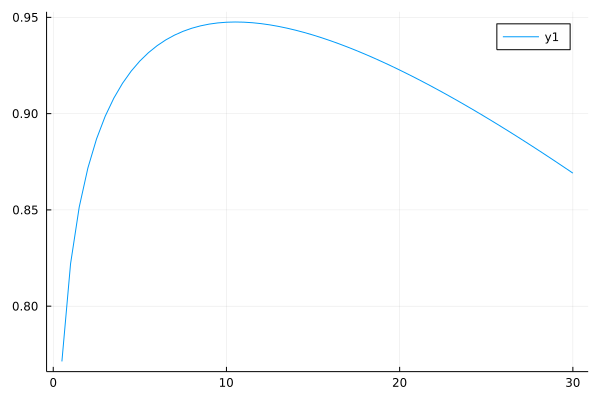

In [37]:
pseudo_C2(K) = pseudo_C(K,Para_ej)
plot( 0.5:0.5:30,pseudo_C2.(0.5:0.5:30)) #, xlim=(0,1000)) # xlim=(a_min_0,500)

In [17]:
golden_K(Para_ej)

28.379258632243634

In [63]:
pseudo_C3(K) = -pseudo_C(K,Para_ej)

K_oro2_sol = optimize(pseudo_C3, 0.5, 30.0, Brent())
K_oro2 = K_oro2_sol.minimizer
K_oro2

10.528737296380545

In [64]:
pseudo_C2(K_oro2)

0.9475863415943114

In [68]:
pseudo_C2(golden_K(Para_ej))

0.9475863415943112

## K de hogares neutrales al riesgo

Es el nivel de capital $K_R$ tal que $E(r)=R_f$

In [17]:
function K_R(P)
    K_guess = ((P.Rf+P.δ)/(P.N*P.η))^(1/(P.η-1))
    sol = fzero(K -> (r(K,P) * P.Pr)[1]-P.Rf, K_guess)
    return sol
end

K_R (generic function with 1 method)

In [34]:
Z_ej, Pz_ej = z_dist(1.0,0.01,0.95,0.65)
Para_ej2 = Parametros(ππ = 0.1, Z = Z_ej, Pz = Pz_ej, Rf = 0.0067, ρ = 0.75, λ = 0.75, γ = 2.0, η = 0.25)

@show K_ej = K_R(Para_ej2)*0.95
@show golden_K(Para_ej2)
@show K_ej/(4*Y(K_ej,Para_ej2))
;

K_ej = K_R(Para_ej2) * 0.95 = 67.03602604259345
golden_K(Para_ej2) = 15.476637858227793
K_ej / (4 * Y(K_ej, Para_ej2)) = 12.38080231439847


In [20]:
4*Y(K_ej,Para_ej2)

7.713210145635379

In [72]:
Z_ej = [1.0 1.0]
Pz_ej = [0.5 0.5]
Z_ej, Pz_ej

([1.0 1.0], [0.5 0.5])

## El ratio Beneficios/Salarios

In [47]:
function part_w(P)
    @unpack λ, ππ, σ, α, ρ, p, A = P
    ratio = (λ+(1-λ)*(1+ππ)^σ) * ρ * A^(σ-1) * p^(1-σ) / (1+α*ππ) 
    return ratio
end

function part_w2(K,P)
    ratio = (P.N*w(K,P))/Y(K,P)
    return ratio
end

part_w2 (generic function with 1 method)

In [36]:
round(1-0.7,digits=7)

0.3

In [37]:
tau=0.7
eta=round(1-tau,digits=7)
Z_ej, Pz_ej = z_dist(1.0,0.0115,0.885,tau)
Para_ej = Parametros(ππ = 0.1, Z = Z_ej, Pz = Pz_ej, Rf = 0.002, 
    ρ = 0.9, λ = 0.7, η = eta, b_min = -6.0, τ = tau, δ = 0.017, γ = 5.0)

Parametros
  γ: Float64 5.0
  β: Float64 0.993
  c_min: Float64 0.001
  η: Float64 0.3
  τ: Float64 0.7
  δ: Float64 0.017
  ρ: Float64 0.9
  σ: Float64 10.000000000000002
  A: Float64 1.0
  Pn: Array{Float64}((2, 2)) [0.9522 0.0478; 0.5 0.5]
  n: Array{Float64}((1, 2)) [1.0 0.4]
  Pe: Float64 0.9127418765972983
  Pu: Float64 0.08725812340270167
  N: Float64 0.947645125958379
  λ: Float64 0.7
  Pλ: Array{Float64}((1, 2)) [0.7 0.30000000000000004]
  Z: Array{Float64}((1, 2)) [1.013629594629953 0.1562472393010309]
  Pz: Array{Float64}((1, 2)) [0.9841032480488543 0.015896751951145704]
  Ez: Float64 1.0
  ζ: Float64 0.8850000112127061
  Pr: Array{Float64}((4,)) [0.688872273634198, 0.011127726365801992, 0.29523097441465634, 0.004769025585343712]
  ππ: Float64 0.1
  Rf: Float64 0.002
  b_min: Float64 -6.0
  p: Float64 1.038700403833769
  α: Float64 0.5021239260222419
  golden_K: Float64 44.19596753828646
  W_Y: Float64 0.63


## Corriendo el Modelo

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Upper bound: 33.5071,   Lower bound: 3.723
436.804362 seconds (1.01 G allocations: 398.959 GiB, 7.41% gc time)
Steady-state value of capital K* = 20.6401, excess demand 0.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
K: 20.6401    K': 20.6401    Diff: -0.0%    B: 11.5798
Ratio: 3.3998   Check1: 0.0006    Check2: -0.0
Parametros
  γ: Float64 5.0
  β: Float64 0.993
  c_min: Float64 0.001
  η: Float64 0.3
  τ: Float64 0.7
  δ: Float64 0.017
  ρ: Float64 0.9
  σ: Float64 10.000000000000002
  A: Float64 1.0
  Pn: Array{Float64}((2, 2)) [0.9522 0.0478; 0.5 0.5]
  n: Array{Float64}((1, 2)) [1.0 0.185]
  Pe: Float64 0.9127418765972983
  Pu: Float64 0.08725812340270167
  N: Float64 0.9288846294267982
  λ: Float64 0.7
  Pλ: Array{Float64}((1, 2)) [0.7 0.30000000000000004]
  Z: Array{Float64}((1, 2)) [1.0259308126288593 0.22871668566248238]
  Pz: Array{Float64}((1, 2)) [0.9674732148468902 0.0325267851531

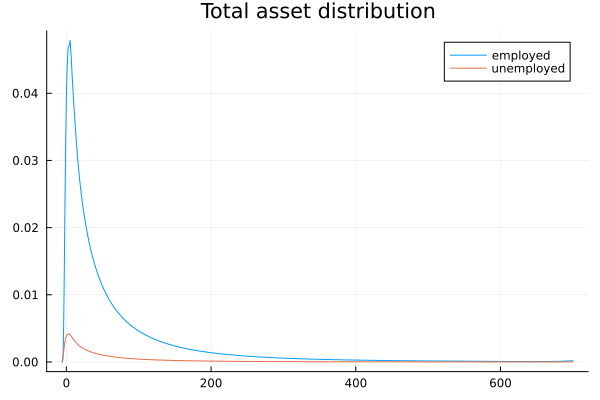

In [376]:
max_iter=1200
tol=1e-5

tau=0.7
eta=round(1-tau,digits=7)
Z_ej, Pz_ej = z_dist(1.0,0.02,0.88,tau)
#Z_ej = [1.0 1.0] ; Pz_ej = [0.5 0.5]
# ρ λ η ππ b_min Rf β δ
Para_ej = Parametros(ππ = 0.3, Z = Z_ej, Pz = Pz_ej, Rf = 0.001, n = [1.0 0.185], 
    ρ = 0.9, λ = 0.7, η = eta, b_min = -6.0, τ = tau, δ = 0.017, γ = 5.0)

Grids_ej = Grids(b_min = -6.0, x_max = 700, grid_p = 120) 
#gx_0 = repeat(Grids_ej.X_grid', outer=[Grids_ej.grid_p, 1, 8])
gx_0 = gx

K_guess = ((Para_ej.Rf+Para_ej.δ)/(Para_ej.N*Para_ej.η))^(1/(Para_ej.η-1))
K_R_ej = fzero(K -> (r(K,Para_ej) * Para_ej.Pr)[1]-Para_ej.Rf, K_guess)
K_upper = K_R_ej * 0.9
K_lower = K_R_ej * 0.1 # <------------------

results, (gx, K_opt, gxn, gc, gc2, de_ss, du_ss), (Para_used, Grids_used) = solve_model(max_iter, tol, gx_0, Para_ej, Grids_ej, K_upper, K_lower)
K_ss, K_out_ss, B_ss, X_ss, r_ss1, r_ss2, r_ss3, r_ss4, rE_ss, rd_ss, W_ss, Y_ss, Investment, C_ss, VarC, Welfare, C_rep, id1, id2, KY_ratio = results

print(Para_ej)
#@show K_ss/(4*Y_ss)

n_ej = 1:Grids_ej.grid_p
plot( Grids_ej.X_grid[n_ej],de_ss[n_ej],label="employed", title="Total asset distribution") #, xlim=(0,1000)) # xlim=(a_min_0,500)
plot!(Grids_ej.X_grid[n_ej],du_ss[n_ej],label="unemployed")

In [377]:
results

20-element Vector{Float64}:
 20.64011976767031
 20.640119828978392
 11.579847419557105
 32.21996724853549
 -0.0008248809712277268
 -0.02169932265787675
  0.06633043933359119
 -0.8195539409481207
  0.010201938911889303
  0.08796734790625589
  1.0295314990431577
  1.517767262026167
  0.3508820360503953
  1.1779087838028814
  0.098865571771799
  7.773733242178823
  1.0632900377113148
  0.0005562895924464684
 -1.1102230246251565e-15
  3.3997504564890373

In [378]:
fzero(K -> (r(K,Para_ej) * Para_ej.Pr)[1]-Para_ej.Rf, K_guess)

37.23009547789097

In [359]:
K_oro = golden_K(Para_ej)
K_oro

29.9486278428501

In [292]:
Z_ej

1×2 Matrix{Float64}:
 1.0254  0.212562

In [293]:
Pz_ej

1×2 Matrix{Float64}:
 0.968753  0.0312472

In [79]:
tau=0.7
Z_ej, Pz_ej = z_dist(1.0,0.02,0.89,tau)

([1.0265776021324269 0.24748652184019826], [0.9658863991582884 0.034113600841711555])

In [46]:
sum(de_ss)*Para_ej.n[1]+sum(du_ss)*Para_ej.n[2]

0.9476451259583789

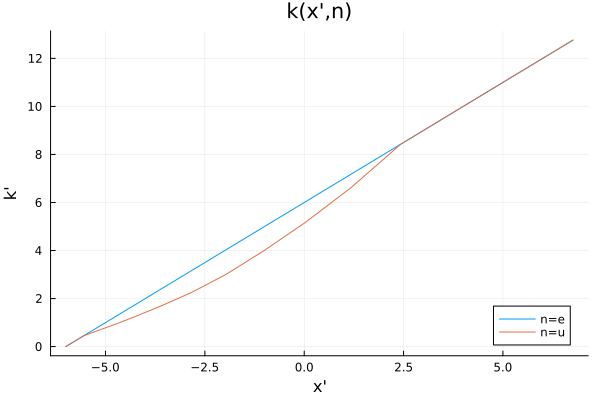

In [23]:
n_ej = 1:17
x_ej = Grids_ej.X_grid[n_ej]

plot( x_ej,K_opt[n_ej,1],label="n=e", title="k(x',n)", legend=:bottomright, xlabel="x'", ylabel="k'")
plot!(x_ej,K_opt[n_ej,2],label="n=u")

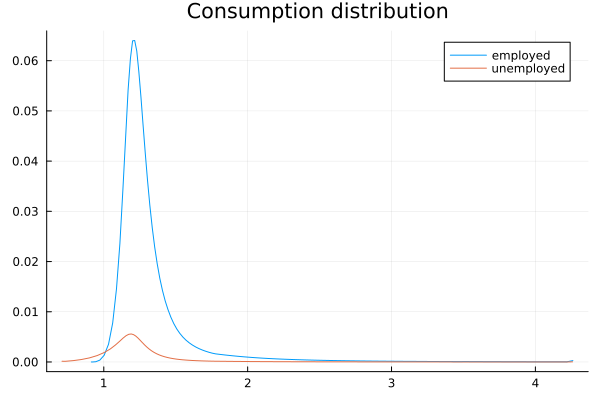

In [43]:
n_ej = 1:Grids_ej.grid_p
plot( gc2[n_ej,1],de_ss[n_ej],label="employed", title="Consumption distribution") #, xlim=(0,1000)) # xlim=(a_min_0,500)
plot!(gc2[n_ej,2],du_ss[n_ej],label="unemployed")

In [89]:
minimum(gc2)

0.12785792151440933

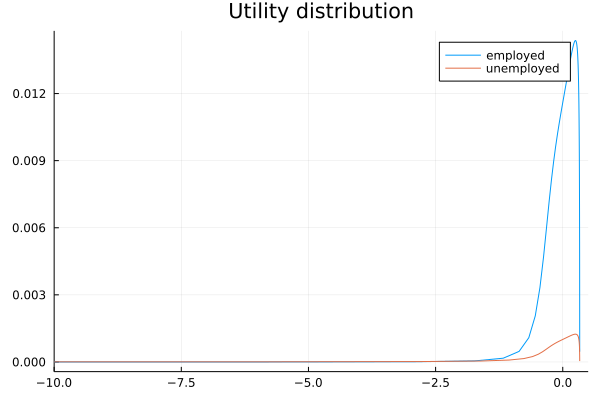

In [92]:
V_ss = u.(gc2,Para_ej.γ,0.001) # cambiar 0.001 por Para.c_min
n_ej = 1:Grids_0.grid_p
plot( V_ss[n_ej,1],de_ss[n_ej],label="employed", title="Utility distribution") #, xlim=(0,1000)) # xlim=(a_min_0,500)
plot!(V_ss[n_ej,2],du_ss[n_ej],label="unemployed",xlim=(-10,0.5))

## Loading Results

In [105]:
@load "result_1.jld2"
@load "result_f_2.jld2"

1-element Vector{Symbol}:
 :results_f

In [51]:
gx = results_f[1]
K_opt  = results_f[2]
gxn = results_f[3]
gc = results_f[4]
gc2 = results_f[5]
de_ss = results_f[6]
du_ss = results_f[7] 
results_f;

In [19]:
K_ss, K_out_ss, B_ss, X_ss, r_ss1, r_ss2, r_ss3, r_ss4, rE_ss, rd_ss, W_ss, Y_ss, Investment, C_ss, Welfare, C_rep, id1, id2, KY_ratio = results;

17-element Vector{Float64}:
  19.44533902847715
  19.445349585123385
 338.4913324741109
 357.9366820592343
   0.01147918021042592
  -0.3346286478494982
   0.012654436965332706
  -0.4628855474477452
   0.007285090603157228
   0.040737619136292466
   0.8454930801693598
   1.1207040237027523
   3.2955452867067123
   0.19445339028477152
   0.00014467403004436719
  -4.440892098500626e-16
   4.337750783706184

In [25]:
Para_ej = Para_used[1]
Grids_ej = Para_used[2]
;

## Buscando el ratio K/Y

In [23]:
function solve_pseudo_model(Para)
        
    # Capital
    K_guess = ((Para.Rf+Para.δ)/(Para.N*Para.η))^(1/(Para.η-1))
    try
        K_ss = fzero(K -> (r(K,Para) * Para.Pr)[1]-Para.Rf, K_guess) * 0.99
    catch e
        return [0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    end

    K_ss = fzero(K -> (r(K,Para) * Para.Pr)[1]-Para.Rf, K_guess) * 0.99

    # Prices
    r_ss = r(K_ss,Para)
    rE_ss = (r_ss * Para.Pr)[1];
    rd_ss = sqrt( (r_ss.^2 * Para.Pr)[1]-rE_ss^2 )
    W_ss = w(K_ss,Para)
        
    # Income
    Y_ss = Y(K_ss,Para)

    # Investment
    Investment = Para.δ * K_ss

    # Check
    Identity_error = rE_ss * K_ss + W_ss * Para.N - ( Y_ss - Investment)
    if Identity_error/Y_ss > 0.005
        println("Identity error: ",Identity_error)
    end
        
    # Target Ratio
    KY_ratio = K_ss/(Y_ss*4)
    #println(round(KY_ratio,digits=2))
    NWY_ratio = W_ss*Para.N/Y_ss
    #println(round(NWY_ratio,digits=4))
        
    return [K_ss, r_ss[1], r_ss[2], r_ss[3], r_ss[4], rE_ss, rd_ss, W_ss, Y_ss, Investment, Identity_error, KY_ratio, NWY_ratio]
end

solve_pseudo_model (generic function with 1 method)

In [35]:
function K_R2(P)
    K_guess = ((P.Rf+P.δ)/(P.N*P.η))^(1/(P.η-1))
    sol = fzero(K -> (r(K,P) * P.Pr)[1]-P.Rf, K_guess)
    return sol
end

K_R2 (generic function with 1 method)

In [19]:
function K_R(P)
    K_guess = ((P.Rf+P.δ)/(P.N*P.η))^(1/(P.η-1))
    f_obj(K) = ((r(K,P) * P.Pr)[1]-P.Rf)^2
    sol = Optim.optimize(f_obj, 0.0, 200.0, Brent()).minimizer
    return max(sol,0.01)
end

K_R (generic function with 1 method)

In [49]:
K_R(Para_ej)

48.58107371777433

In [ ]:
K_R(Para_ej)

In [79]:
function solve_pseudo_model2(Para)
        
    #K_guess = ((Para.Rf+Para.δ)/(Para.N*Para.η))^(1/(Para.η-1))
    try
        K_ss = K_R(Para)
    catch e
        return 10.0, 2.0
    end
    K_ss = K_R(Para)

    W_ss = w(K_ss,Para)
    Y_ss = Y(K_ss,Para)

    KY_ratio = K_ss/(Y_ss*4)
    NWY_ratio = W_ss*Para.N/Y_ss
    
    #if KY_ratio < 0
    #    return 10.0, 2.0
    #end
    #if NWY_ratio < 0
    #    return 10.0, 2.0
    #end
        
    return KY_ratio, NWY_ratio
end

solve_pseudo_model2 (generic function with 1 method)

In [55]:
tau1,rho1,lambda1,var_z1,zeta1 = [0.75,0.75,0.75,0.005,0.95]

5-element Vector{Float64}:
 0.75
 0.75
 0.75
 0.005
 0.95

In [56]:
tau1

0.75

In [155]:
function loss_pseudo_model(x::Vector)
    tau, rho, lambda, eta = x
    
    Z_ej, Pz_ej = z_dist(1.0,0.005,0.97,tau)
    Para_ej = Parametros(
        β = 0.993,
        η = eta,
        τ = tau,
        δ = 0.017,
        ρ = rho,
        Pn = [0.9522 0.0478; 0.5 0.5],
        n = [1.0 0.4],
        λ = lambda,
        Z = Z_ej,
        Pz = Pz_ej,
        Rf = 0.007)
    
    try
        KY_ratio, NWY_ratio = solve_pseudo_model2(Para_ej)
    catch e
        return 999999
    end    
    KY_ratio, NWY_ratio = solve_pseudo_model2(Para_ej)
    
    return ((KY_ratio-3)/9)^2 + ((NWY_ratio-0.46)/0.46)^2
end
                              


loss_pseudo_model (generic function with 2 methods)

In [34]:
loss_pseudo_model(0.75,0.75,0.75,0.005,0.95)

375961.6873323825

In [156]:
# loss_pseudo_model(tau,rho,lambda,eta)

ll = [0.2,0.1,0.6,0.05]
uu = [0.95,1.0,0.9,0.7]
x0 = [0.75,0.75,0.75,0.25]
sol1 = optimize(loss_pseudo_model, ll, uu, x0, Fminbox())


#@time calibracion = optimize(loss_pseudo_model, [0.01,0.1,0.51,0.00001,0.1], [0.99,0.99,0.99,1.0,0.999])

 * Status: success

 * Candidate solution
    Final objective value:     6.628146e-02

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 6.20e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.71e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 3.73e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    3
    f(x) calls:    49
    ∇f(x) calls:   49


In [157]:
results4 = sol1.minimizer

4-element Vector{Float64}:
 0.7074798390347395
 0.7285938379431599
 0.7499881697897361
 0.37499277734624986

In [160]:
function loss_pseudo_model2(x::Vector)
    rho, lambda = x
    tau = 0.5/rho
    eta = 1 - tau
    
    Z_ej, Pz_ej = z_dist(1.0,0.005,0.97,tau)
    Para_ej = Parametros(
        β = 0.993,
        η = eta,
        τ = tau,
        δ = 0.017,
        ρ = rho,
        Pn = [0.9522 0.0478; 0.5 0.5],
        n = [1.0 0.4],
        λ = lambda,
        Z = Z_ej,
        Pz = Pz_ej)
    
    try
        KY_ratio, NWY_ratio = solve_pseudo_model2(Para_ej)
    catch e
        return 999999
    end    
    KY_ratio, NWY_ratio = solve_pseudo_model2(Para_ej)
    
    return exp(KY_ratio-3)
end
     

loss_pseudo_model2 (generic function with 1 method)

In [161]:
ll = [0.52,0.6]
uu = [1.0,0.9]
x0 = [0.75,0.75]
sol2 = optimize(loss_pseudo_model2, ll, uu, x0, Fminbox())

 * Status: success (objective increased between iterations)

 * Candidate solution
    Final objective value:     8.966413e+00

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 1.94e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.48e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 3.96e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   5  (vs limit Inf)
    Iterations:    4
    f(x) calls:    453
    ∇f(x) calls:   453


In [162]:
results24 = sol2.minimizer

2-element Vector{Float64}:
 0.9542854044028092
 0.8999999999999831

In [163]:
results23

2-element Vector{Float64}:
 0.9542854044234734
 0.8999999999832496

In [164]:
0.5/0.954

0.5241090146750524

In [130]:
rho = 1.11
tau=0.15
eta = 0.55
lambda=0.75

Z_ej, Pz_ej = z_dist(1.0,0.005,0.97,tau)
    Para_ej = Parametros(
        β = 0.993,
        η = eta,
        τ = tau,
        δ = 0.017,
        ρ = rho,
        Pn = [0.9522 0.0478; 0.5 0.5],
        n = [1.0 0.4],
        λ = lambda,
        Z = Z_ej,
        Pz = Pz_ej)
resultsM1 = solve_pseudo_model(Para_ej)

13-element Vector{Float64}:
 1896.7211254230256
    0.012838880483878951
   -0.0026681991792152984
   -0.003940657215876249
   -0.003988728135732577
    0.007108789450147917
    0.00783514726190647
    9.63021719321971
   54.85367864354651
   32.24425913219144
    5.684341886080802e-14
    8.644457273998038
    0.16637039868152778

In [ ]:
resultsM1

In [131]:
rho = 1.11
tau=0.57
eta = 0.38
lambda=0.82
Z_ej, Pz_ej = z_dist(1.0,0.005,0.97,tau)
    Para_ej = Parametros(
        β = 0.993,
        η = eta,
        τ = tau,
        δ = 0.017,
        ρ = rho,
        Pn = [0.9522 0.0478; 0.5 0.5],
        n = [1.0 0.4],
        λ = lambda,
        Z = Z_ej,
        Pz = Pz_ej)
resultsM2 = solve_pseudo_model(Para_ej)

13-element Vector{Float64}:
 70.82711992459768
  0.01167492847601221
 -0.2761214071242462
  0.0013634698912466901
 -0.061574806130945445
  0.007150015902261861
  0.027235663837801703
  3.1073371799403593
  4.655129005770181
  1.2040610387181607
 -3.552713678800501e-15
  3.8037141310587312
  0.6325609729890933

In [ ]:
Z_ej, Pz_ej = z_dist(1.0,0.005,0.97,tau)
    Para_ej = Parametros(
        β = 0.993,
        η = eta,
        τ = tau,
        δ = 0.017,
        ρ = rho,
        Pn = [0.9522 0.0478; 0.5 0.5],
        n = [1.0 0.4],
        λ = lambda,
        Z = Z_ej,
        Pz = Pz_ej)

In [20]:
using ProgressMeter

In [27]:
count_i=0
for tau in 0.6:0.005:0.7 #11
    for zeta in 0.97:0.01:0.97 #1
        for var_z in 0.005:0.005 #1
            Z_ej, Pz_ej = z_dist(1.0,var_z,zeta,tau)
            for rho in 0.7:0.01:0.9 #11
                for lambda in 0.7:0.7 #1
                    for delta in 0.017:0.017 #2
                        for rate in 0.0065:0.0065 #3
                            for infla in 0.1:0.1 #1
                                
                                
                                count_i += 1
                                
                            end
                        end
                    end
                end
            end
        end
    end
end
count_i

441

In [28]:
count_i = 0
results = Array{Float64}(undef, (1,28))
#p = ProgressMeter.Progress(176)

for tau in 0.6:0.005:0.7 #11
    for zeta in 0.97:0.01:0.97 #1
        for var_z in 0.005:0.005 #1
            Z_ej, Pz_ej = z_dist(1.0,var_z,zeta,tau)
            for rho in 0.7:0.01:0.9 #11
                for lambda in 0.7:0.7 #1
                    for delta in 0.017:0.017 #2
                        for rate in 0.0065:0.0065 #3
                            for infla in 0.1:0.1 #1
                                #ProgressMeter.next!(p)
                            
                                count_i += 1
                                #println("Iteration $(count_i): tau=($tau) z=$(zeta), V(z)=$(var_z), ρ=$(rho), λ=$(lambda), η=$(eta),  R_f=$(rate), π=$(infla)")
                                
                                eta = 1 - tau
                                
                                Para_ej = Parametros(Z = Z_ej, Pz = Pz_ej, ρ = rho, λ = lambda, δ = delta,
                                                     Rf = rate,  ππ = infla,  τ=tau, η = eta) # β = 0.97    
                                result = solve_pseudo_model(Para_ej)
                                
                                K_oro = golden_K(Para_ej)
                                
                                vec_para = [count_i, tau, zeta, var_z, Z_ej[1], Z_ej[2], Pz_ej[1], Pz_ej[2], rho, lambda, delta, eta, rate, infla, K_oro]
                                result = [vec_para; result]
                                results = [results ; result']

                            end
                        end
                    end
                end
            end
        end
    end
end

In [29]:
results

442×28 Matrix{Float64}:
   1.2969e-315  1.2969e-315  1.29691e-315  …  1.29586e-315  1.29577e-315
   1.0          0.6          0.97             6.13103       0.420197
   2.0          0.6          0.97             6.0675        0.426206
   3.0          0.6          0.97             6.00396       0.432214
   4.0          0.6          0.97             5.94041       0.438224
   5.0          0.6          0.97          …  5.87686       0.444234
   6.0          0.6          0.97             5.8133        0.450245
   7.0          0.6          0.97             5.74973       0.456257
   8.0          0.6          0.97             5.68615       0.462269
   9.0          0.6          0.97             5.62256       0.468283
  10.0          0.6          0.97          …  5.55895       0.474298
  11.0          0.6          0.97             5.49533       0.480315
  12.0          0.6          0.97             5.43169       0.486333
   ⋮                                       ⋱                
 430.0        

In [30]:
# Requiere cambios
columnas =  ["count_i", "tau", "zeta", "var_z", "Z1", "Z2", "Pz1", "Pz2", "rho", "lambda", "delta", "eta", "rate", "infla", "K_oro", "K_R", "r_ss1", "r_ss2", "r_ss3", "r_ss4", "rE_ss", "rd_ss", "W_ss", "Y_ss", "Investment", "id_error", "KY_ratio",  "NWY_ratio"]

XLSX.openxlsx("resultados_pseudo.xlsx", mode="w") do xf
    sheet = xf[1]
    sheet["A1"] = columnas
    sheet["A2:AB443"] = results  # <- celda final del rango debe estar ubicada en la fila (alto de results + 1)
end
;

## Resultados del modelo (Iteración)

In [82]:
count_i=0.0

iterations = [1]

for E_z_inv in 0.95:0.95 #1
    for var_z in 0.005:0.005
        Z_ej, Pz_ej = z_dist(1.0,var_z,E_z_inv)
        #Z_ej = [1.0 1.0]; Pz_ej =[0.5 0.5]
        for rho in 0.75:0.75 #
            for lambda in 0.75:0.75 #1 
                for rra_coef in 2.0:2.0:6.0 #3
                    for rate in 0.0005:0.0005:0.0015 #2
                        for infla in 0.1:0.2:0.3 

                            count_i += 1
                            #if count_i ∉ iterations
                            #    println("SKIP")
                            #    continue
                            #end
                            
                            
                            println("Iteration $(count_i): E(1/z)=$(E_z_inv), V(z)=$(var_z), ρ=$(rho), λ=$(lambda), γ=$(rra_coef),  R_f=$(rate), π=$(infla)")

                            
                            println("------------------------------------------------------------")


                        end
                    end
                end
            end
        end
    end
end


Iteration 1.0: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=2.0,  R_f=0.0005, π=0.1
------------------------------------------------------------
Iteration 2.0: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=2.0,  R_f=0.0005, π=0.3
------------------------------------------------------------
Iteration 3.0: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=2.0,  R_f=0.001, π=0.1
------------------------------------------------------------
Iteration 4.0: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=2.0,  R_f=0.001, π=0.3
------------------------------------------------------------
Iteration 5.0: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=2.0,  R_f=0.0015, π=0.1
------------------------------------------------------------
Iteration 6.0: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=2.0,  R_f=0.0015, π=0.3
------------------------------------------------------------
Iteration 7.0: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=4.0,  R_f=0.0005, π=0.1
------------------------------------------------------------
I

In [83]:
#iterations = [1] # ¿Qué iteraciones quiero que haga?

max_iter=1200
tol=1e-5
b_min_ej = -10.0

Grids_ej = Grids(b_min = b_min_ej, x_max = 600, grid_p = 120)
#gx_0 = results_f[1][2] # Si este está activo el de abajo no debe estarlo
gx_0 = repeat(Grids_ej.X_grid', outer=[Grids_ej.grid_p, 1, 8]) # Si este está activo el de arriba no debe estarlo
n_ej = 1:Grids_ej.grid_p


count_i = 0
results = Array{Float64}(undef, (1,34))
results_f=[]

for E_z_inv in 0.95:0.95 #1
    for var_z in 0.005:0.005
        Z_ej, Pz_ej = z_dist(1.0,var_z,E_z_inv)
        #Z_ej = [1.0 1.0]; Pz_ej =[0.5 0.5]
        for rho in 0.75:0.75 #
            for lambda in 0.75:0.75 #1 
                for rra_coef in 2.0:2.0:6.0 #3
                    for rate in 0.0005:0.0005:0.0015 #2
                        for infla in 0.1:0.2:0.3 
                            
                            count_i += 1
                            println("Iteration $(count_i): E(1/z)=$(E_z_inv), V(z)=$(var_z), ρ=$(rho), λ=$(lambda), γ=$(rra_coef),  R_f=$(rate), π=$(infla)")
                            #if count_i ∉ iterations
                            #    println("------------------------------------------------------------")
                            #    continue
                            #end
                            
                            Para_ej = Parametros(Z = Z_ej, Pz = Pz_ej, ρ = rho, λ = lambda, γ = rra_coef,
                                                 Rf = rate,  ππ = infla,  b_min = b_min_ej, η = 0.25) #η = 0.1, δ = 0.005, β = 0.97
 
                            K_gold =  golden_K(Para_ej)
                            K_guess = ((Para_ej.Rf+Para_ej.δ)/(Para_ej.N*Para_ej.η))^(1/(Para_ej.η-1))
                            K_Rf = fzero(K -> (r(K,Para_ej) * Para_ej.Pr)[1]-Para_ej.Rf, K_guess)
                            K_upper = K_Rf # * 1.05
                            
                            if rate <= 0.0065
                                lower_coef = 0.5 
                            else
                                lower_coef = 0.7
                            end
                            K_lower = K_Rf * lower_coef

                            @time result, (gx, K_opt, gxn, gc, gc2, de_ss, du_ss) = solve_model(max_iter, tol, gx_0, Para_ej, Grids_ej, K_upper, K_lower)
                            # K_ss, K_out_ss, B_ss, X_ss, r_ss1, r_ss2, r_ss3, r_ss4, rE_ss, rd_ss, W_ss, Y_ss, C_ss, Investment, VarC, Welfare, id1, id2, KY_ratio = result

                            gx_0 = gx
                            
                            #pl = plot( Grids_ej.X_grid[n_ej],de_ss[n_ej],label="employed", title="Total asset distribution")
                            #pl = plot!(pl, Grids_ej.X_grid[n_ej],du_ss[n_ej],label="unemployed")
    
                            vec_para = [count_i, E_z_inv, var_z, Z_ej[1], Z_ej[2], Pz_ej[1], Pz_ej[2], rho, lambda, rra_coef, rate, infla, K_Rf, K_gold]
                            result = [vec_para; result]
                            results = [results ; result']
                            

                            result_f = [count_i, gx, K_opt, gxn, gc, gc2, de_ss, du_ss] #, pl]
                            push!(results_f,result_f)
                            
                            println("------------------------------------------------------------")

                        end
                    end
                end
            end
        end
    end
end

writedlm( "results.csv",  results, ',')

Iteration 1: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=2.0,  R_f=0.0005, π=0.1
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Upper bound: 57.6071,   Lower bound: 28.8035
578.642538 seconds (1.36 G allocations: 546.289 GiB, 5.28% gc time)
Steady-state value of capital K* = 30.3758, excess demand 0.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
K: 30.3758    K': 30.3758    Diff: -0.0%    B: -10.0
Ratio: 3.6831   Check1: 0.0012    Check2: 0.0
610.606117 seconds (1.44 G allocations: 576.938 GiB, 5.28% gc time)
------------------------------------------------------------
Iteration 2: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=2.0,  R_f=0.0005, π=0.3
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Upper bound: 55.4636,   Lower bound: 27.7318
372.592236 seconds (862.15 M allocations: 344.316 GiB, 5.07% gc time)
Steady-state value of capital K* = 29.015, excess demand 0.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - 

277.791167 seconds (659.61 M allocations: 257.503 GiB, 5.21% gc time)
Steady-state value of capital K* = 30.6622, excess demand 0.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
K: 30.6622    K': 30.6622    Diff: 0.0%    B: -4.7941
Ratio: 3.8159   Check1: 0.0    Check2: -0.0
298.249692 seconds (709.02 M allocations: 276.787 GiB, 5.22% gc time)
------------------------------------------------------------
Iteration 15: E(1/z)=0.95, V(z)=0.005, ρ=0.75, λ=0.75, γ=6.0,  R_f=0.001, π=0.1
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Upper bound: 54.1402,   Lower bound: 27.0701
421.305945 seconds (829.60 M allocations: 328.571 GiB, 5.03% gc time)
Steady-state value of capital K* = 34.1607, excess demand 0.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
K: 34.1607    K': 34.1607    Diff: -0.0%    B: -9.4775
Ratio: 4.0222   Check1: 0.0004    Check2: 0.0
447.970222 seconds (880.97 M allocations: 348.921 GiB, 5.03% gc time)
----

In [ ]:
pyplot();

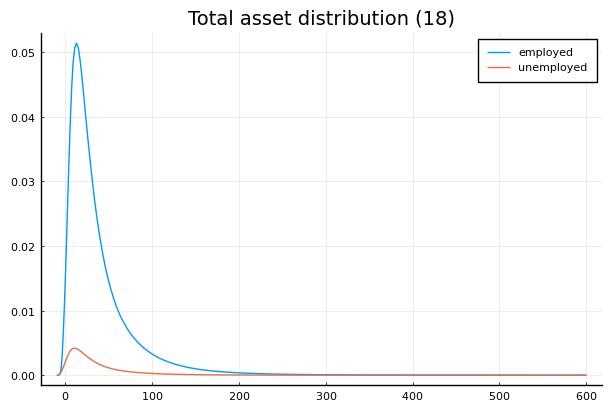

┌ Info: Saved animation to 
│   fn = C:\Users\nicot\GitHub\Heterogeneous Agents\notebooks\Modelo 6 - Calvo Pricing y dos activos\tmp.gif
└ @ Plots C:\Users\nicot\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\nicot\\GitHub\\Heterogeneous Agents\\notebooks\\Modelo 6 - Calvo Pricing y dos activos\\tmp.gif")
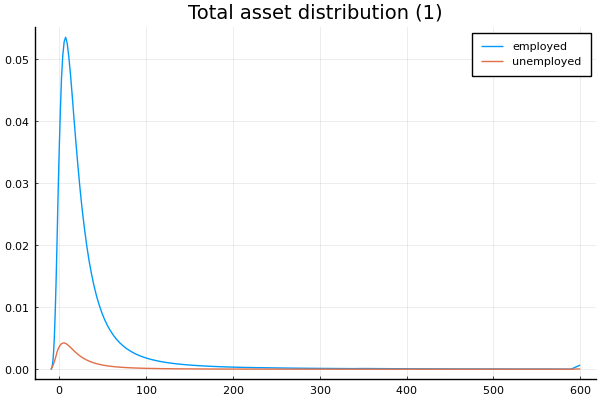

In [84]:
anim_dist_X = @animate for count_i in 1:size(results_f)[1]
    
    de_ss = results_f[count_i][7]
    du_ss = results_f[count_i][8]
    n_ej = 1:Grids_ej.grid_p

    # Create the plot
    plot(Grids_ej.X_grid[n_ej], de_ss[n_ej], label="employed", title="Total asset distribution ($count_i)")
    plot!(Grids_ej.X_grid[n_ej], du_ss[n_ej], label="unemployed")
    
end
gif(anim_dist_X, fps = 0.5)

In [85]:
@save "results_3_6.jld2" results
@save "results_f_3_6.jld2" results_f

In [32]:
@load "results_3_3.jld2"
@load "results_f_3_3.jld2"

1-element Vector{Symbol}:
 :results_f

In [86]:
results

19×34 Matrix{Float64}:
  8.32155e-317  7.2929e-304  …  7.74682e-304   0.0          0.0
  1.0           0.95            0.00119746     2.22045e-16  3.68313
  2.0           0.95            0.000366511   -4.44089e-16  3.66108
  3.0           0.95            0.00116577     4.44089e-16  3.68221
  4.0           0.95            0.00032527    -2.22045e-16  3.66097
  5.0           0.95         …  0.00116473     4.44089e-16  3.6824
  6.0           0.95            0.000282519   -6.66134e-16  3.66084
  7.0           0.95            0.002052       4.44089e-16  3.80447
  8.0           0.95            4.32397e-5    -4.44089e-16  3.7754
  9.0           0.95            0.00175753     2.22045e-16  3.80552
 10.0           0.95         …  2.82912e-5    -6.66134e-16  3.7692
 11.0           0.95            0.00142495     0.0          3.80664
 12.0           0.95            1.89845e-5    -6.66134e-16  3.75833
 13.0           0.95            0.000633402    4.44089e-16  4.02372
 14.0           0.95            

In [87]:
# Requiere cambios
columnas =  ["count_i", "E_z_inv", "var_z", "Z1", "Z2", "Pz1", "Pz2", "rho", "lambda", "rra_coef", "rate", "infla", "K_R", "K_oro", "K_ss", "K_out_ss","B_ss", "X_ss", "r_ss1", "r_ss2", "r_ss3", "r_ss4", "rE_ss", "rd_ss", "W_ss", "Y_ss", "Investment", "C_ss", "VarC", "Welfare", "C_rep", "id1", "id2", "KY_ratio"]

XLSX.openxlsx("resultados.xlsx", mode="w") do xf
    sheet = xf[1]
    sheet["A1"] = columnas
    sheet["A2:AH20"] = results  # <- celda final del rango debe estar ubicada en la fila (alto de results + 1)
end
;

In [97]:
# Only K_gold and K_R

max_iter=1200
tol=1e-5
b_min_ej = -10.0

count_i = 0
results = Array{Float64}(undef, (1,14))

Grids_ej = Grids(b_min = b_min_ej, x_max = 3500, grid_p = 175)
gx_0 = repeat(Grids_ej.X_grid', outer=[Grids_ej.grid_p, 1, 8])
n_ej = 1:Grids_ej.grid_p

for E_z_inv in 0.95:0.95 #1
    for var_z in 0.005:0.005 # <- modificar
        Z_ej, Pz_ej = z_dist(1.0,var_z,E_z_inv)
        #Z_ej = [1.0 1.0]; Pz_ej =[0.5 0.5]
        for rho in 0.8:0.8 #
            for lambda in 0.75:0.75 #1 
                for rra_coef in 1.0:2.0 #3
                    for rate in 0.0065:0.00025:0.00675 #2
                        for infla in 0.1:0.2:0.3 
                            
                            count_i += 1
                            println("Iteration $(count_i): E(1/z)=$(E_z_inv), V(z)=$(var_z), ρ=$(rho), λ=$(lambda), γ=$(rra_coef),  R_f=$(rate), π=$(infla)")
                            #if count_i ∉ iterations
                            #    println("------------------------------------------------------------")
                            #    continue
                            #end
                            
                            Para_ej = Parametros(Z = Z_ej, Pz = Pz_ej, ρ = rho, λ = lambda, γ = rra_coef,
                                                 Rf = rate,  ππ = infla,  b_min = b_min_ej, η = 0.2) #η = 0.1, δ = 0.005, β = 0.97
 
                            K_gold =  golden_K(Para_ej)
                            K_guess = ((Para_ej.Rf+Para_ej.δ)/(Para_ej.N*Para_ej.η))^(1/(Para_ej.η-1))
                            K_Rf = fzero(K -> (r(K,Para_ej) * Para_ej.Pr)[1]-Para_ej.Rf, K_guess)*1.05
                            
                            
                            result = [count_i, E_z_inv, var_z, Z_ej[1], Z_ej[2], Pz_ej[1], Pz_ej[2], rho, lambda, rra_coef, rate, infla, K_Rf, K_gold]
                            results = [results ; result']
                            
                            println("------------------------------------------------------------")
                            
                            if count_i==2
                                break
                            end

                        end
                    end
                end
            end
        end
    end
end

writedlm( "results_K.csv",  results, ',')


Iteration 1: E(1/z)=0.95, V(z)=0.005, ρ=0.8, λ=0.75, γ=1.0,  R_f=0.0065, π=0.1
------------------------------------------------------------
Iteration 2: E(1/z)=0.95, V(z)=0.005, ρ=0.8, λ=0.75, γ=1.0,  R_f=0.0065, π=0.3
------------------------------------------------------------
Iteration 3: E(1/z)=0.95, V(z)=0.005, ρ=0.8, λ=0.75, γ=1.0,  R_f=0.00675, π=0.1
------------------------------------------------------------
Iteration 4: E(1/z)=0.95, V(z)=0.005, ρ=0.8, λ=0.75, γ=1.0,  R_f=0.00675, π=0.3
------------------------------------------------------------
Iteration 5: E(1/z)=0.95, V(z)=0.005, ρ=0.8, λ=0.75, γ=2.0,  R_f=0.0065, π=0.1
------------------------------------------------------------
Iteration 6: E(1/z)=0.95, V(z)=0.005, ρ=0.8, λ=0.75, γ=2.0,  R_f=0.0065, π=0.3
------------------------------------------------------------
Iteration 7: E(1/z)=0.95, V(z)=0.005, ρ=0.8, λ=0.75, γ=2.0,  R_f=0.00675, π=0.1
------------------------------------------------------------
Iteration 8: E(1/

## Plots

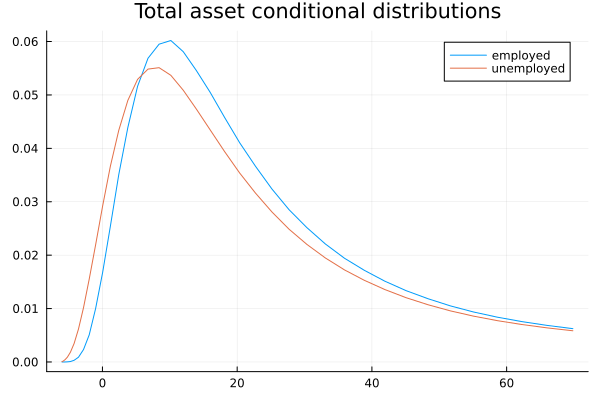

In [24]:
n_ej = 1:40
deC_ss=de_ss/sum(de_ss)
duC_ss=du_ss/sum(du_ss)
plot( Grids_ej.X_grid[n_ej],deC_ss[n_ej],label="employed", title="Total asset conditional distributions") #, xlim=(0,1000)) # xlim=(a_min_0,500)
plot!(Grids_ej.X_grid[n_ej],duC_ss[n_ej],label="unemployed")

In [33]:
n_ej = 1:80
plot( K_opt[n_ej,1],de_ss[n_ej],label="employed", title="Risky asset distributions") #, xlim=(0,1000)) # xlim=(a_min_0,500)
plot!(K_opt[n_ej,2],du_ss[n_ej],label="unemployed")

LoadError: UndefVarError: de not defined

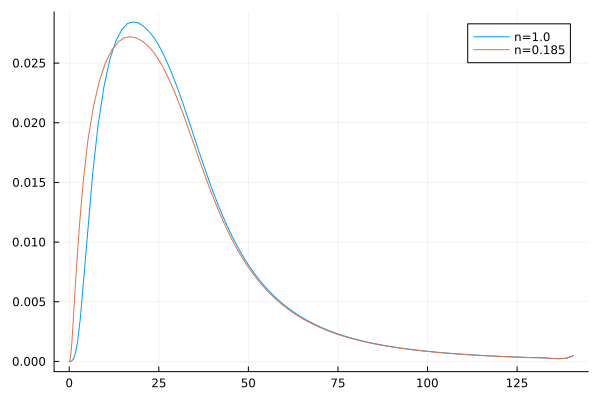

In [346]:
# Capital distribution
n_ej = 1:120
deC_ss=de_ss/sum(de_ss)
duC_ss=du_ss/sum(du_ss)
plot( K_opt[n_ej,1],deC_ss[n_ej],label="n=1.0")#, title="Risky asset distributions") #, xlim=(0,1000)) # xlim=(a_min_0,500)
plot!(K_opt[n_ej,2],duC_ss[n_ej],label="n=0.185")

In [347]:
B_opt = similar(K_opt)
B_opt[:,1] = Grids_ej.X_grid - K_opt[:,1]
B_opt[:,2] = Grids_ej.X_grid - K_opt[:,2]
;

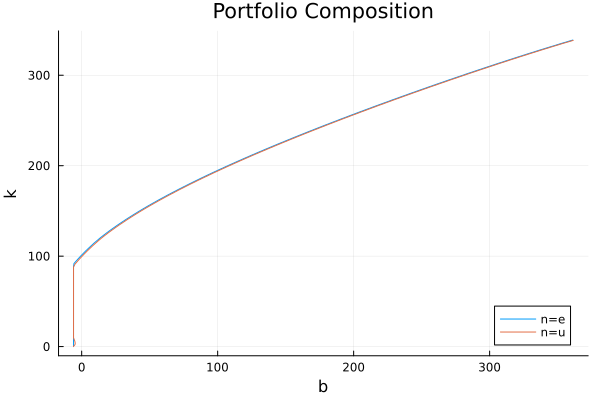

In [24]:
n_ej = 1:Grids_ej.grid_p
plot( B_opt[n_ej,1],K_opt[n_ej,1],label="n=e", title="Portfolio Composition", legend=:bottomright, xlabel="b", ylabel="k")
plot!(B_opt[n_ej,2],K_opt[n_ej,2],label="n=u")

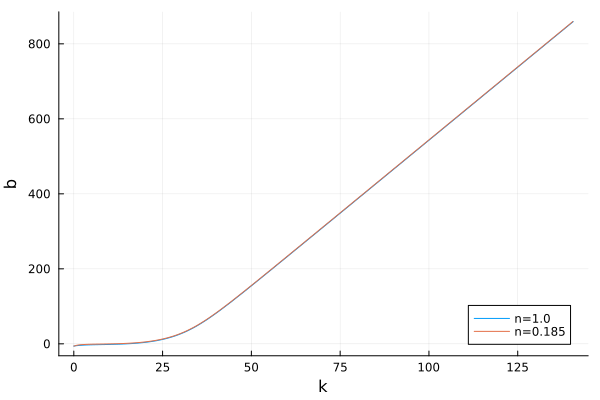

In [348]:
# Portfolio Composition
n_ej = 1:Grids_ej.grid_p
plot( K_opt[n_ej,1],B_opt[n_ej,1],label="n=1.0", legend=:bottomright, xlabel="k", ylabel="b") #, title="Portfolio Composition")
plot!(K_opt[n_ej,2],B_opt[n_ej,2],label="n=0.185")

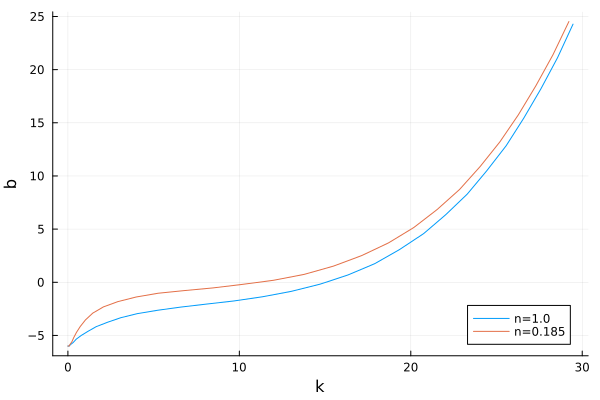

In [349]:
# Portfolio COmposition - Zoomed
n_ej = 1:30
plot( K_opt[n_ej,1],B_opt[n_ej,1],label="n=1.0", legend=:bottomright, xlabel="k", ylabel="b") #, title="Portfolio Composition")
plot!(K_opt[n_ej,2],B_opt[n_ej,2],label="n=0.185")

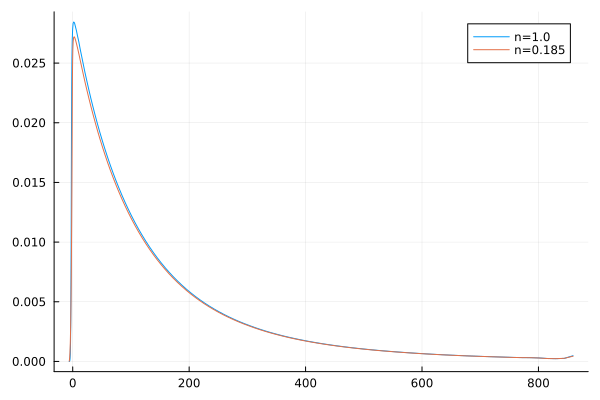

In [351]:
# Distribución de Bonos
n_ej = 1:120
plot( B_opt[n_ej,1],deC_ss[n_ej],label="n=1.0") #, title="Bond (safe asset) distribution", xlim=(0,1000)) # xlim=(a_min_0,500)
plot!(B_opt[n_ej,2],duC_ss[n_ej],label="n=0.185")

In [130]:
B_opt = similar(K_opt)
B_opt[:,1] = Grids_ej.X_grid - K_opt[:,1]
B_opt[:,2] = Grids_ej.X_grid - K_opt[:,2]

n_ej = 10:30
B_opt[n_ej,2]

21-element Vector{Float64}:
 -4.806180550940357
 -4.764849549121382
 -4.895768772463963
 -5.110580477176115
 -5.545293387201342
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0

In [131]:
perm_b =  sortperm(B_opt[:,2])

120-element Vector{Int64}:
   1
   2
   3
  15
  16
  17
  18
  19
  20
  21
  22
  23
  24
   ⋮
 109
 110
 111
 112
 113
 114
 115
 116
 117
 118
 119
 120

In [132]:
B_opt[perm_b,2]

120-element Vector{Float64}:
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
  -6.0
   ⋮
 277.47214878608196
 284.6272240065043
 291.8796440213714
 299.22018289548356
 306.6482187357964
 314.1791748087478
 321.7907849273029
 329.52069455823687
 337.3266607505267
 345.2678745882788
 353.2876687491463
 361.45325355085026

In [134]:
valor_buscado = -6.0

posiciones = findall(x -> x == valor_buscado, B_opt[perm_b,2])


32-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 21
 22
 23
 24
 25
 26
 27
 28
 29
 30
 31
 32

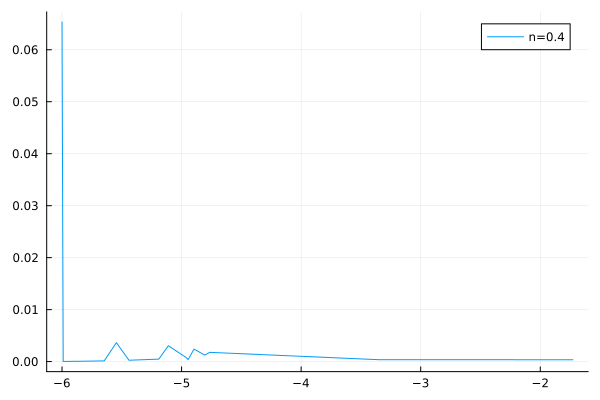

In [177]:
perm_b =  sortperm(B_opt[:,2])

B_dom_dist = unique(B_opt[perm_b,2])
duB_ss = zeros(length(B_dom_dist))

du_2 = du_ss[perm_b]

for i in 1:length(B_dom_dist)
    
    valor_buscado = B_dom_dist[i]

    posiciones = findall(x -> x == valor_buscado, B_opt[perm_b,2])
    
    duB_ss[i] = sum(du_2[posiciones])
    
end

n_ej=15
plot(B_dom_dist[1:n_ej],duB_ss[1:n_ej],label="n=0.4")

In [165]:
Grilla_B = Grids_ej.B_grid

puntos = length(Grilla_B)-1

b_minimo = Grilla_B[1]

posiciones = findall(x -> x == b_minimo, B_opt[perm_b,2])

duB_ss[1] = sum(du_2[posiciones])

for i in 1:puntos
    
    b_limite_inferior = Grilla_B[i]
    b_limite_superior = Grilla_B[i+1]
    
    posiciones = findall(x -> b_limite_inferior < x <= b_limite_superior, B_opt)
    
    duB_ss[i] = sum(du_2[posiciones])
    
end

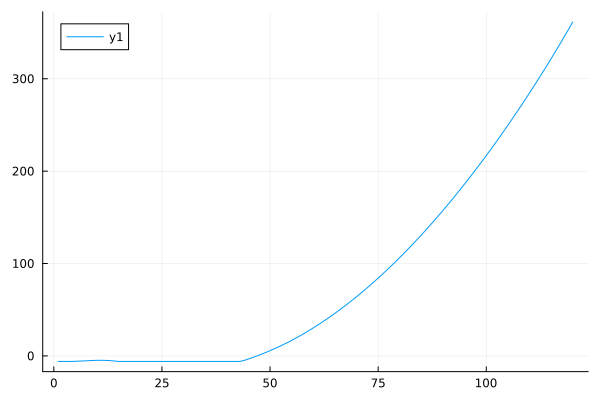

In [215]:

plot(1:120,B_opt[:,2])

In [ ]:
dist_b = similar(B_opt)
b_max2 = minimum(B_opt[grid_p,:])
B_grid2 = collect(range(0, stop=(b_max2-b_min)^(0.5), length=grid_p)).^2 .+ b_min
for ε in 1:2
    ε==1 ? dist=de_ss : dist=du_ss
    fx_ip(x) =  LinearInterpolation(X_grid,dist,extrapolation_bc=Line())(x)
    for i in 1:grid_p
        b=B_grid2[i]
        b_ip(x) = LinearInterpolation(X_grid, B_opt[:,ε].-b, extrapolation_bc=Line())(x)
        rts = find_zeros(b_ip, x_min,x_max)
        dist_b[i,ε]=sum(fx_ip.(rts))
    end
end
plot( B_grid2,dist_b[:,1],label="employed", title="Bond (safe asset) distribution")
plot!(B_grid2,dist_b[:,2],label="unemployed")

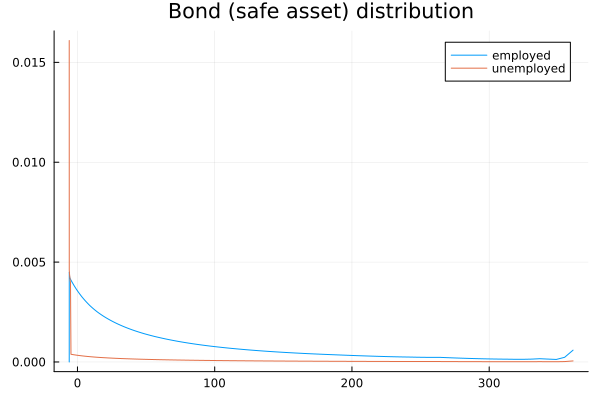

In [181]:
dist_b = similar(B_opt)



# Creo una nueva grilla Para b
b_max2 = minimum(B_opt[Grids_ej.grid_p,:])
B_grid2 = collect(range(0, stop=(b_max2-Grids_ej.b_min)^(0.5), length=Grids_ej.grid_p)).^2 .+ Grids_ej.b_min


for ε in 1:2
    ε==1 ? dist=de_ss : dist=du_ss
    
    # Convierto a la distribución vectorizada de x en una función que acepte cualquier valor de x
    fx_ip(x) =  LinearInterpolation(Grids_ej.X_grid,dist,extrapolation_bc=Line())(x)
    
    
    for i in 1:Grids_ej.grid_p
        
        # Para cada punto en la grilla de B
        b=B_grid2[i]
        
        # Busco el valor (o los valores) de x que hace que kappa(x,n)=b
        b_ip(x) = LinearInterpolation(Grids_ej.X_grid, B_opt[:,ε].-b, extrapolation_bc=Line())(x)
        rts = find_zeros(b_ip, Grids_ej.x_min,Grids_ej.x_max)

        dist_b[i,ε]=sum(fx_ip.(rts)) # sumo la probabilidad de todos esos valores de x
    end
end
plot( B_grid2,dist_b[:,1],label="employed", title="Bond (safe asset) distribution")
plot!(B_grid2,dist_b[:,2],label="unemployed")

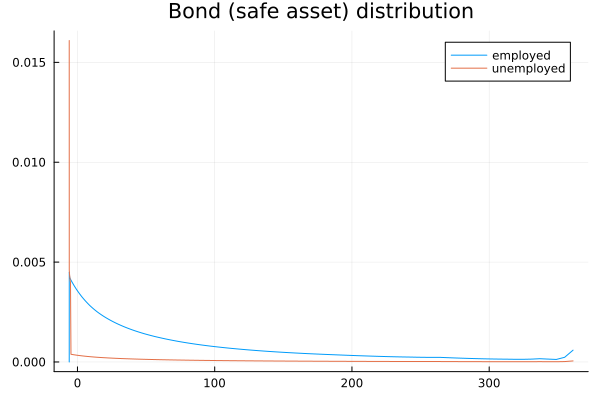

In [212]:
puntos_grilla_B = 120
dist_b = zeros(puntos_grilla_B, 2)



# Creo una nueva grilla Para b
b_max2 = minimum(B_opt[Grids_ej.grid_p,:])
B_grid2 = collect(range(0, stop=(b_max2-Grids_ej.b_min)^(0.5), length=puntos_grilla_B)).^2 .+ Grids_ej.b_min


for ε in 1:2
    ε==1 ? dist=de_ss : dist=du_ss
    
    # Convierto a la distribución vectorizada de x en una función que acepte cualquier valor de x
    fx_ip(x) =  LinearInterpolation(Grids_ej.X_grid,dist,extrapolation_bc=Line())(x)
    
    
    for i in 1:puntos_grilla_B
        
        # Para cada punto en la grilla de B
        b=B_grid2[i]
        
        # Busco el valor (o los valores) de x que hace que kappa(x,n)=b
        b_ip(x) = LinearInterpolation(Grids_ej.X_grid, B_opt[:,ε].-b, extrapolation_bc=Line())(x)
        rts = find_zeros(b_ip, Grids_ej.x_min,Grids_ej.x_max)

        dist_b[i,ε]=sum(fx_ip.(rts)) # sumo la probabilidad de todos esos valores de x
    end
end
plot( B_grid2,dist_b[:,1],label="employed", title="Bond (safe asset) distribution")
plot!(B_grid2,dist_b[:,2],label="unemployed")

In [209]:
sum(dist_b[:,1])+sum(dist_b[:,2])

1.0096972662955463

In [ ]:
function allocate_mass(y_n, y_grid, grid_size)
       
    m = searchsortedfirst(y_grid, y_n)  # y_m > y_n > y_{m-1}
    m = min(m, grid_size)  # max = grid size.   If y_n > x_max => the above function returns max+1.  We don't wnat that 
    
    if isone(m)               # if y_n is too small that y_1 > y_n
        return 2, 0           # then we force m=2 and assign 0 weight  ( m-1 = 1 and its weight is 1)
    end
    
    y_m = y_grid[m]
    y_m_1 = y_grid[m-1]
    
    D_y = y_m - y_m_1
    
    peso_m = (y_n - y_m_1) / D_y      
    peso_m = min(max(peso_m, 0.0), 1.0)  # Por las dudas 

    return m, peso_m
end


In [ ]:

function transition_mat(gxn::Array, Para, Grid)
    @unpack X_grid, grid_p = Grid
    @unpack Pn, Pr = Para
    
    T = fill(0.0,(2*grid_p,2*grid_p))
    
    # Loop current period t risky asset holding:
    for x_j = 1:grid_p

        # Loop over current period t employment state:
        for ε_j = 0:1
                
            # Loop over possible next period t+1 business state:
            for  z in 1:4
              
                # Loop over possible next period t+1 employment state:
                for ε_i in 0:1
                    
                    x_prime = gxn[x_j, ε_j+1, 4*ε_i+z]  # x_prime
                    x_i, peso_x_i = allocate_mass(x_prime, X_grid, grid_p)      #  a_i > x' > a_{i-1}

                    j = ε_j*grid_p + x_j # current position
                    i = ε_i*grid_p + x_i # next position
                    
                    T[i  , j] +=    peso_x_i  * Pn[ε_j+1 ,ε_i+1] * Pr[z]
                    T[i-1, j] += (1-peso_x_i) * Pn[ε_j+1 ,ε_i+1] * Pr[z]
                    
                end
            end
        end
    end
    return T
end

In [239]:
b_min = -6.0

posicion_b_problematico_final = 0
for i in 1:length(B_opt[:,1])
    if B_opt[i+1,2] == b_min && B_opt[i,2] > b_min
        posicion_b_problematico_final = i
        break
    end
end

posicion_b_problematico_inicial = 0
for i in 2:posicion_b_problematico_final
    if B_opt[i-1,2] == b_min && B_opt[i,2] > b_min
        posicion_b_problematico_inicial = i
        break
    end
end

B_opt[(posicion_b_problematico_inicial-1):(posicion_b_problematico_final+1),2]

13-element Vector{Float64}:
 -6.0
 -5.990155134124149
 -5.836123058216751
 -5.6471873172181715
 -5.440205309379767
 -5.1904004547660865
 -4.962992612436336
 -4.806180550940357
 -4.764849549121382
 -4.895768772463963
 -5.110580477176115
 -5.545293387201342
 -6.0

In [259]:
posicion_b_problematico_final = 0
for i in 1:(length(B_opt[:,1])-1)
    if B_opt[i+1,1] == b_min && B_opt[i,1] > b_min
        posicion_b_problematico_final = i
        break
    end
end

In [260]:
posicion_b_problematico_final

0

In [250]:
du_ss

120-element Vector{Float64}:
 4.8738343134657505e-6
 5.265673320408195e-6
 1.3317437322548798e-5
 3.0390716237593237e-5
 6.557164178625859e-5
 0.00013537090951334303
 0.0002613386299053913
 0.0004735613770653747
 0.0007986934247526287
 0.0012431217103991371
 0.0017779702249455073
 0.0024014884763643948
 0.003052192207658468
 ⋮
 1.830698132426534e-5
 1.6822263727943373e-5
 1.552352998012628e-5
 1.4406698566068964e-5
 1.363358634224715e-5
 1.3105449663488936e-5
 1.2360270807926655e-5
 1.3336929098947452e-5
 1.576432545646934e-5
 1.2660794087683803e-5
 1.1021534325768913e-5
 5.418732659799262e-5

In [262]:
function distribucion_B(B_opt_n, dist, b_min)
    
    posicion_b_problematico_final = 0
    for i in 1:(length(B_opt[:,2])-1)
        if B_opt_n[i+1] == b_min && B_opt_n[i] > b_min
            posicion_b_problematico_final = i
            break
        end
    end
    
    if posicion_b_problematico_final == 0
        return B_opt_n, dist
    end
    
    posicion_b_problematico_inicial = 0
    for i in 2:posicion_b_problematico_final
        if B_opt_n[i-1] == b_min && B_opt_n[i] > b_min
            posicion_b_problematico_inicial = i
            break
        end
    end
  
    B_opt_bueno = copy(B_opt_n)
    dist_B_u = copy(dist)
    deleteat!(B_opt_bueno, posicion_b_problematico_inicial:posicion_b_problematico_final)
    deleteat!(dist_B_u, posicion_b_problematico_inicial:posicion_b_problematico_final)

    B_opt_malo = B_opt_bueno[posicion_b_problematico_inicial:posicion_b_problematico_final]
    du_a_realocar = dist_B_u[posicion_b_problematico_inicial:posicion_b_problematico_final]
    
    f_bmin=0.0
    ultimo_b_min = 0
    
    for i in 1:length(B_opt_bueno)
        f_bmin += dist_B_u[i]
        if B_opt_bueno[i+1] > b_min
            ultimo_b_min = i
            break
        end
    end
    
    
    deleteat!(B_opt_bueno, 2:ultimo_b_min)
    deleteat!(dist_B_u, 2:ultimo_b_min)
    dist_B_u[1] = f_bmin
    
    
    @assert length(B_opt_bueno) == length(unique(B_opt_bueno)) "Hay repetidos (problemáticos) en B_opt_bueno"
    
    for i in 1:length(B_opt_malo)
        b = B_opt_malo[i]
        f_b = du_a_realocar[i]
        
        # Ubicar b en la grilla B_opt_bueno
        posicion_m, peso_b_m = allocate_mass(b, B_opt_bueno, length(B_opt_bueno))      #  b_m > b_i > b_{m-1}
        
        dist_B_u[posicion_m]   += peso_b_m     * f_b
        dist_B_u[posicion_m-1] += (1-peso_b_m) * f_b
        
    end
    
    return B_opt_bueno, dist_B_u
    
end

distribucion_B (generic function with 1 method)

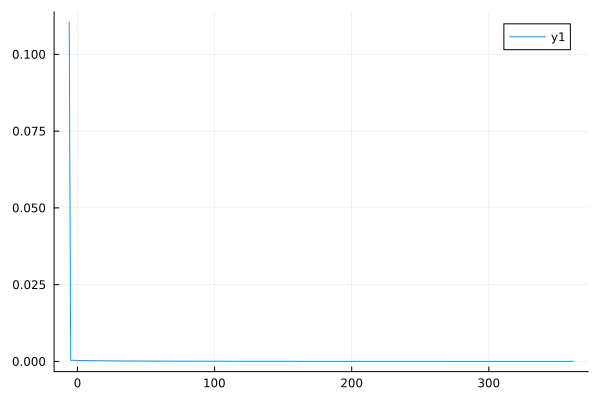

In [264]:
B_opt_bueno, dist_B_u = distribucion_B(B_opt[:,2], du_ss, b_min)
plot(B_opt_bueno, dist_B_u)

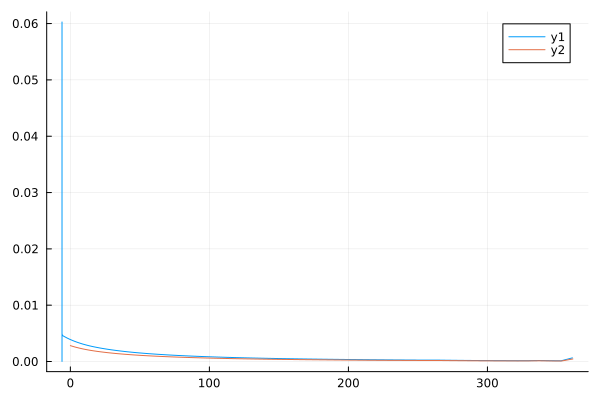

In [275]:
B_opt_bueno_u, dist_B_u = distribucion_B(B_opt[:,2], du_ss, b_min)
B_opt_bueno_e, dist_B_e = distribucion_B(B_opt[:,1], de_ss, b_min)

distC_B_u=dist_B_u/(sum(dist_B_u))
distC_B_e=dist_B_e/(sum(dist_B_e))

plot(B_opt_bueno_e[5:end], distC_B_e[5:end])
plot!(B_opt_bueno_u[5:end], distC_B_u[5:end])

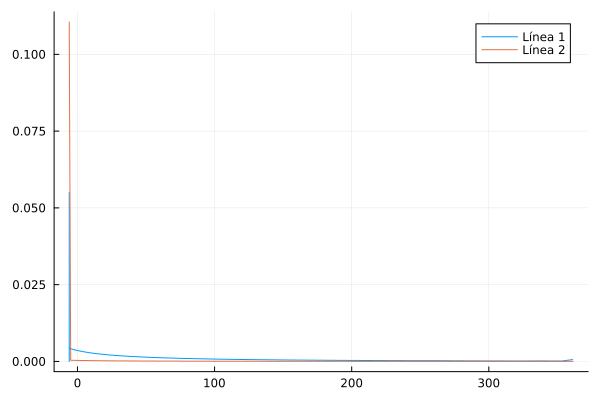

In [271]:
# Creas el primer gráfico
plot(x1, y1, label="Línea 1")

# Agregas la segunda línea al gráfico existente
plot!(x2, y2, label="Línea 2")

In [249]:
B_opt_bueno = B_opt[:,2]
dist_B_u = copy(du_ss)
deleteat!(B_opt_bueno, posicion_b_problematico_inicial:posicion_b_problematico_final)
deleteat!(dist_B_u, posicion_b_problematico_inicial:posicion_b_problematico_final)


B_opt_malo = B_opt[posicion_b_problematico_inicial:posicion_b_problematico_final, 2]
du_a_realocar = du_ss[posicion_b_problematico_inicial:posicion_b_problematico_final]
#B_opt_bueno[20:40]


11-element Vector{Float64}:
 3.0390716237593237e-5
 6.557164178625859e-5
 0.00013537090951334303
 0.0002613386299053913
 0.0004735613770653747
 0.0007986934247526287
 0.0012431217103991371
 0.0017779702249455073
 0.0024014884763643948
 0.003052192207658468
 0.003642396937386591

In [251]:
# dónde está el último b_min

f_bmin=0.0
ultimo_b_min = 0

for i in 1:length(B_opt_bueno)
    f_bmin += dist_B_u[i]
    if B_opt_bueno[i+1] > b_min
        ultimo_b_min = i
        break
    end
end


deleteat!(B_opt_bueno, 2:ultimo_b_min)
deleteat!(dist_B_u, 2:ultimo_b_min)
dist_B_u[1] = f_bmin


@assert length(B_opt_bueno) == length(unique(B_opt_bueno)) "Hay repetidos (problemáticos) en B_opt_bueno"

0.0017905812957054981

In [252]:
for i in 1:length(B_opt_malo)
    b = B_opt_malo[i]
    f_b = du_a_realocar[i]
    
    # Ubicar b en la grilla B_opt_bueno
    posicion_m, peso_b_m = allocate_mass(b, B_opt_bueno, length(B_opt_bueno))      #  b_m > b_i > b_{m-1}
    
    dist_B_u[posicion_m]   += peso_b_m     * f_b
    dist_B_u[posicion_m-1] += (1-peso_b_m) * f_b
    
end

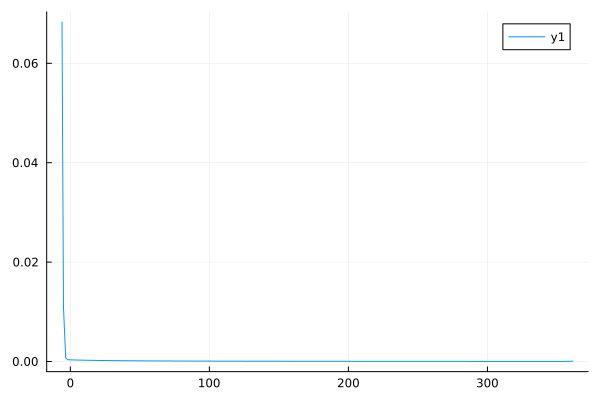

In [253]:
plot(B_opt_bueno,dist_B_u)

In [254]:
sum(dist_B_u)

0.08725812340270166

In [255]:
sum(du_ss)

0.08725812340270166

In [213]:
B_grid2' * dist_b[:,1] + B_grid2' * dist_b[:,2]

6.317123554703675

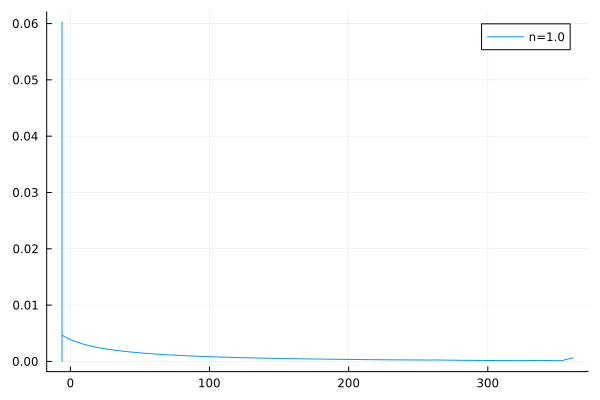

In [214]:
n_ej=1:120
plot( B_opt[n_ej,1],deC_ss[n_ej],label="n=1.0")

In [191]:
B_opt[35:55,1]

21-element Vector{Float64}:
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -6.0
 -5.666803995200965
 -4.060869817089213
 -2.4036545602591843
 -0.6732100826406935
  1.1557191055983935
  3.0269009408469714
  5.010420628966543
  7.065451556402294
  9.179356202155759
 11.433990570601537
 13.73492862695116
 16.184086873186203

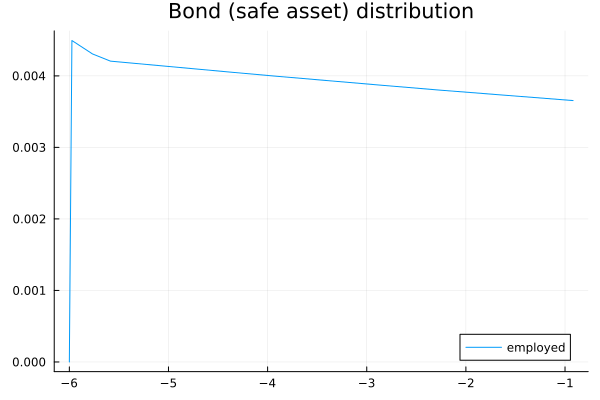

In [192]:
n_ej=1:15
plot( B_grid2[n_ej],dist_b[n_ej,1],label="employed", title="Bond (safe asset) distribution")

In [143]:
length(B_opt[perm_b,2])

120

In [138]:
B_dom_dist = unique(B_opt[perm_b,2])

duB_ss =zeros(length(B_dom_dist))

89-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

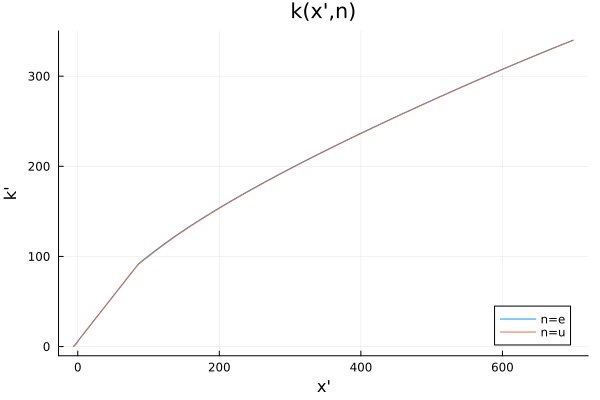

In [30]:
n_ej = 1:120
x_ej = Grids_ej.X_grid[n_ej]

plot( x_ej,K_opt[n_ej,1],label="n=e", title="k(x',n)", legend=:bottomright, xlabel="x'", ylabel="k'")
plot!(x_ej,K_opt[n_ej,2],label="n=u")

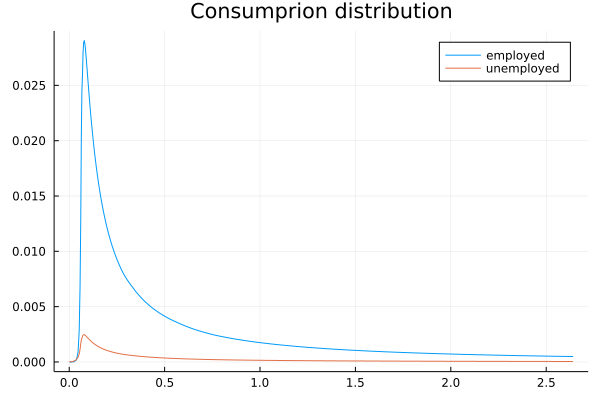

In [170]:
# Utility Function Plots
#1
x_ej = -0.5:0.0005:1.0
y_ej = u.(x_ej,1.0,0.001) # u_crra.(x_ej,4.0)
plot(x_ej,y_ej,ylim=(-100,1))x_ej = -0.25:0.0005:1.0
#2
y_ej = UMg.(x_ej,1.0,-10.0) # u_crra.(x_ej,4.0)
plot(x_ej,y_ej,ylim=(-0.01,1000))
#3
x_ej = -0.25:0.0005:1.0
y_ej = UMg.(x_ej,1.0,0.01) # u_crra.(x_ej,4.0)
plot(x_ej,y_ej,ylim=(-0.01,1000))
#4
x_ej = -0.25:0.0005:1.0
y_ej = UMg.(x_ej,4.0,0.15) # u_crra.(x_ej,4.0)
x_ej2 = UMg_inv.(y_ej,4.0,0.15) # u_crra.(x_ej,4.0)
@show maximum(x_ej-x_ej2)
plot(x_ej,y_ej,ylim=(-0.01,10000))

In [48]:
vectorcito = zeros(15)
for x in 15:-1:1  
    if 150 > x^2
        if x > 5 
            println("sol interior")
            vectorcito[x]=0
        else 
            println("esto debe ser lo último que se muestre, luego el loop debe terminar")
            vectorcito[1:x]=fill(-1,x)
            break # SALIR DEL LOOP
        end
    else
        println("esto debe aparecer al comienzo")
        vectorcito[x]=1
    end
    println(x)
    println("-------------------------")
end
vectorcito

esto debe aparecer al comienzo
15
-------------------------
esto debe aparecer al comienzo
14
-------------------------
esto debe aparecer al comienzo
13
-------------------------
sol interior
12
-------------------------
sol interior
11
-------------------------
sol interior
10
-------------------------
sol interior
9
-------------------------
sol interior
8
-------------------------
sol interior
7
-------------------------
sol interior
6
-------------------------
esto debe ser lo último que se muestre, luego el loop debe terminar


15-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  1.0
  1.0
  1.0

In [83]:
function construir_h(gx::Array, r::Array, W::Float64, Para, Grid)
    
    @unpack Rf, n, Pn, Pr, β, γ, c_min = Para
    @unpack K_grid, X_grid, K_mat, X_mat, grid_p, b_min = Grid
    
    ### STEP 1 ###
    
    C_next = similar(gx)
    for ε in 0:1    # ε=0 empleado    ;    ε=1 desempleado
        for z in 1:4
            C_next[:, :, 4*ε+z] = 
            X_mat*(1+Rf) + K_mat*(r[z]-Rf) .+ W*n[ε+1] .- gx[:,:, 4*ε+z]
        end
    end
    
    h = Array{Float64}(undef, grid_p, grid_p, 2)
    he = Array{Float64}(undef, grid_p, grid_p)
    hu = similar(he)
    for x in 1:grid_p
        he[:,x] = β * ((r.-Rf) .* UMg.(C_next[:,x,1:4 ],γ,c_min) ) * Pr # empleado 
        hu[:,x] = β * ((r.-Rf) .* UMg.(C_next[:,x,5:8],γ,c_min) ) * Pr # desempleado 
        h[:,x,:] = [he[:,x] hu[:,x]] * Pn'
    end
    
    return h
end

construir_h (generic function with 1 method)

In [60]:
r_ss = r(K_ss,Para_ej)
h_ej = construir_h(gx,r_ss,W_ss,Para_ej,Grids_ej);

In [61]:
diag(h_ej[:,:,1])[1:3]

3-element Vector{Float64}:
 0.08952327473342153
 0.0328533271950219
 0.01171394471943804

In [62]:
h_ej[1,1,1], h_ej[2,2,1], h_ej[3,3,1]

(0.08952327473342153, 0.0328533271950219, 0.01171394471943804)

In [89]:
function construir_kappa(h::Array, Grid)
    
    @unpack K_grid, X_grid, K_mat, X_mat, grid_p, b_min = Grid

    K_opt = Array{Float64}(undef, grid_p, 2)
    η_b = fill(0.0,size(K_opt))
    
    # CASO 4: k = x_max - b_min = 0
    K_opt[1,:] = [0.0, 0.0]
    η_b[1,:] = h[1,1,:]
    
    
    for ε in 1:2    # ε=1 empleado    ;    ε=2 desempleado
        for x in grid_p:-1:2  # Itero al revés desde valores grandes de x hacia valores más pequeños
            
            domain = K_grid[1:x] # Defino los valores de k posibles para un x dado
            image = h[1:x,x,ε]   # Calculo h para todos los valores posibles de k dado x
            
            # CASO 1: Raíz Interior
            if any(image .> 0.0) 
                if any(image .< 0.0) # si hay valores positivos y negativos de h
                    K_opt[x,ε] = root_interp(domain, image, length(image)) # hallo k que hace h=0 mediante una interpolación
                    
                # CASO 2: h>0 para todo k   =>  k_opt = x - b_min    
                else 
                    K_opt[2:x,ε] = K_grid[2:x] # Desde el inicio hasta este punto voy a obtener este resultado
                    η_b[2:x,ε] = diag(h_ej[:,:,ε])[2:x]
                    #println("Esto solo se debe imprimir una vez por estado laboral. La última iteración en ε=$ε fue $(x)")
                    break
                end
            
            # CASO 3: h<0 para todo k   =>   k_opt = 0
            else
                K_opt[x,ε] = 0.0
            end
        end
    end
    
    return K_opt, η_b
end

construir_kappa (generic function with 1 method)

In [90]:
K_opt_ej, η_b_ej=construir_kappa(h_ej,Grids_ej)

([0.0 0.0; 0.049855236212131615 0.049855236212131615; … ; 336.38905037813606 336.059026928652; 340.05799940638605 339.7297275385298], [0.08952327473342153 0.8600477448269933; 0.0328533271950219 0.2738553138284389; … ; 0.0 0.0; 0.0 0.0])

In [92]:
η_b_ej

120×2 Matrix{Float64}:
 0.0895233     0.860048
 0.0328533     0.273855
 0.0117139     0.0672092
 0.00398726    0.00227045
 0.0015867    -0.00926129
 0.000787507  -0.00869668
 0.000445168  -0.00657379
 0.000364073  -0.00424149
 0.000322533  -0.00256295
 0.000306481  -0.00151312
 0.000310707  -0.000862339
 0.000302619  -0.000441813
 0.000304449  -0.000166488
 ⋮            
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0
 0.0           0.0

In [80]:
function construir_gxn(K_opt::Array, gx::Array, Grid)
    
    @unpack K_grid, X_grid, K_mat, X_mat, grid_p, b_min = Grid
    
    ### STEP 2 ###
    
    gxn = Array{Float64}(undef, grid_p, 2, 8)
    for ε_next in 0:1    # ε=0 empleado ; ε=1 desempleado    en t+1
        for z_next in 1:4
            
            gxn[1,1,ε_next*4+z_next] = gx[1,1,ε_next*4+z_next]
            gxn[1,2,ε_next*4+z_next] = gx[1,1,ε_next*4+z_next]
            
            for x in 2:grid_p
                dominio = K_grid[1:x]
                imagen = gx[1:x,x,ε_next*4+z_next]
                #imagen = Interpolations.deduplicate_knots!(imagen)
                for ε_now in 1:2
                    gxn[x,ε_now,ε_next*4+z_next] = LinearInterpolation(dominio, imagen, extrapolation_bc=Line())(K_opt[x,ε_now])
                end
            end
        end
    end
    
    return gxn
end
gxn_ej = construir_gxn(K_opt_ej, gx, Grids_ej);

In [79]:
function construir_gxn2(K_opt::Array, gx::Array, Grid)
    
    @unpack K_grid, X_grid, K_mat, X_mat, grid_p, b_min = Grid
    
    ### STEP 2 ###
    
    gxn = Array{Float64}(undef, grid_p, 2, 8)
    for ε_next in 0:1    # ε=0 empleado ; ε=1 desempleado    en t+1
        for z_next in 1:4      
            for x in 1:grid_p
                dominio = K_grid
                imagen = gx[:,x,ε_next*4+z_next]
                #imagen = Interpolations.deduplicate_knots!(imagen)
                for ε_now in 1:2
                    gxn[x,ε_now,ε_next*4+z_next] = LinearInterpolation(dominio, imagen, extrapolation_bc=Line())(K_opt[x,ε_now])
                end
            end
        end
    end
    
    return gxn
end
gxn_ej2 = construir_gxn2(K_opt_ej, gx, Grids_ej);

In [81]:
maximum((gxn_ej2-gxn_ej1).^2)

0.0

In [93]:
function EGM_final(gxn::Array, η_b::Array, gx::Array, r::Array, W::Float64, Para, Grid)
    
    @unpack Rf, n, Pn, Pr, β, γ, c_min = Para
    @unpack K_grid, X_grid, K_mat, X_mat, grid_p, b_min = Grid
    

    C_next_opt = Array{Float64}(undef, grid_p, 2, 8)
    for ε_next in 0:1    # ε=0 empleado ; ε=1 desempleado    en t+1
        for z_next in 1:4
            for ε_now in 1:2   # ε=1 empleado ; ε=2 desempleado   en t
                C_next_opt[:, ε_now, 4*ε_next+z_next] = 
                X_grid*(1+Rf) + K_opt[:,ε_now] * (r[z_next]-Rf) .+ W*n[ε_next+1] .- gxn[:,ε_now,4*ε_next+z_next]
            end
        end
    end
    # C_next_opt = max.(C_next_opt,1e-10); It might be the case that you have debt a negatve return on capital and Inada's condition guarantees this, but just in case

    E_UMg = similar(K_opt); E_UMge = similar(K_opt); E_UMgu = similar(K_opt); 
    for ε in 1:2 # estado laboral en t
        E_UMge[:,ε] = UMg.(C_next_opt[:,ε,1:4],γ,c_min) * Pr # empleado en t+1
        E_UMgu[:,ε] = UMg.(C_next_opt[:,ε,5:8],γ,c_min) * Pr # desempleado en t+1
        E_UMg[:,ε] = Pn[ε,1] * E_UMge[:,ε] + Pn[ε,2] * E_UMgu[:,ε]
    end
    C_current = UMg_inv.( β*(1+Rf)*E_UMg + η_b ,γ,c_min);
    
    V_1 = C_current + repeat(X_grid, outer=[1,2]) - repeat(W*n, outer=[grid_p,1]) #<-
    perm_e =  sortperm(V_1[:,1])
    V_1e = V_1[perm_e,1]
    V_1e=Interpolations.deduplicate_knots!(V_1e)
    V_3e = LinearInterpolation(V_1e, X_grid[perm_e], extrapolation_bc=Line())
    perm_u =  sortperm(V_1[:,2])
    V_1u = V_1[perm_u,2]
    V_1u=Interpolations.deduplicate_knots!(V_1u)
    V_3u = LinearInterpolation(V_1u, X_grid[perm_u], extrapolation_bc=Line())

    V_2 = Array{Float64}(undef, grid_p, grid_p, 4)
    for z in 1:4 
        V_2[:,:,z] =  X_mat*(1+Rf) + K_mat * (r[z]-Rf)
    end
      
    gx_new = similar(gx)
    for z in 1:4
        gx_new[:, :,z  ] =  V_3e.(V_2[:,:,z])
        gx_new[:, :,4+z] =  V_3u.(V_2[:,:,z])
    end
    
    gx_new = max.(gx_new,b_min);

    return gx_new, C_next_opt
    
end

EGM_final (generic function with 1 method)

In [94]:
function EGM(gx::Array, r::Array, W::Float64, Para, Grid; all_outputs::Bool=false)
    
    @assert Para.b_min == Grid.b_min "b_min en los Parámetros es $(Para.b_min), pero en la grilla es $(Grid.b_min)"
    
    ### STEP 1 ###
    
    h = construir_h(gx, r, W, Para, Grid)

    K_opt , η_b = construir_kappa(h, Grid)
    
    
    ### STEP 2 ###
    
    gxn = construir_gxn(K_opt, gx, Grid)
    
    gx_new, C_next_opt = EGM_final(gxn, η_b, gx, r, W, Para, Grid)


    if all_outputs==false
        return gx_new
    else
        return gx_new, K_opt, gxn, C_next_opt
    end
    
end

EGM (generic function with 1 method)

In [97]:
gx_old = gx
gx_new = EGM(gx_old,r_ss,W_ss,Para_ej,Grids_ej)

120×120×8 Array{Float64, 3}:
[:, :, 1] =
 -5.31391    -5.27465    -5.15385    …  663.129  674.723  686.417  698.21
 -5.31356    -5.2743     -5.15348       663.129  674.724  686.417  698.211
 -5.31252    -5.27325    -5.15237       663.131  674.725  686.419  698.212
 -5.31077    -5.27151    -5.15051       663.133  674.727  686.421  698.214
 -5.30833    -5.26907    -5.1479        663.136  674.73   686.424  698.217
 -5.30519    -5.26593    -5.14456    …  663.14   674.734  686.428  698.221
 -5.30136    -5.26209    -5.14047       663.145  674.739  686.433  698.226
 -5.29682    -5.25756    -5.13564       663.151  674.745  686.439  698.232
 -5.29159    -5.25232    -5.13006       663.157  674.751  686.445  698.239
 -5.28566    -5.2464     -5.12374       663.165  674.759  686.453  698.246
 -5.27903    -5.23977    -5.11668    …  663.173  674.767  686.461  698.255
 -5.27171    -5.23244    -5.10887       663.182  674.777  686.471  698.264
 -5.26369    -5.22442    -5.10032       663.193  674.787  68

In [98]:
maximum(abs.(gx_old - gx_new))

0.004388502683905671

In [120]:
gx_old = gx_new
gx_new = EGM(gx_old,r_ss,W_ss,Para_ej,Grids_ej)
maximum(abs.(gx_old - gx_new))

0.0001512666299792187